# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?


--------------
## **Context**
--------------

⏩ Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims to match human-level performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI (also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial expressions, voice tone, etc. and react appropriately to them.

In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses.


----------------
## **Objective**
----------------

⏩ The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.


-------------
## **About the dataset**
-------------

⏩ The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/Colab Notebooks/Capstone/data/'

Facial_emotion_images.zip


## **Importing the Libraries**

In [3]:
# Importing data support libraries, including graph support
import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import operator
import os
import pandas as pd
import pickle
import random
import seaborn as sns
import zipfile

# Importing Machine Learning utilities
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Importing Deep Learning Libraries
import tensorflow as tf
import tensorflow.keras.applications as ap

from tensorflow.keras import backend
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Reshape
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

# For environment checklist
from psutil import virtual_memory

In [4]:
# Reviewing TensorFlow library version
print('TF version: ', tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except:
  print('ERROR: Not connected to a TPU runtime')

TF version:  2.12.0
Running on TPU  ['10.30.87.242:8470']


In [5]:
# Reviewing the memory available
ram_gb = virtual_memory().total / 1e9
print('Runtime has {:.1f} gigabytes of available RAM'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('Using a high-RAM runtime!')

Runtime has 37.8 gigabytes of available RAM
Using a high-RAM runtime!


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [6]:
file = '/content/drive/MyDrive/Colab Notebooks/Capstone/data/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract it from the zip file
with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall()

### **Global Variables**

In [7]:
# Global variables
IMG_DIR = '/content/Facial_emotion_images'
MODEL_DIR = f'/content/drive/MyDrive/Colab Notebooks/Capstone/model'

TRAIN_PATH = IMG_DIR + '/train'
TEST_PATH = IMG_DIR + '/test'
VAL_PATH = IMG_DIR + '/validation'

SEED = 0

FACE_EXPRESSIONS = ['happy', 'neutral', 'sad', 'surprise']

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [8]:
def reading_files(path, name_of_set, show_sample_images=True, pick_random=True):
  """Read files in the directory path.
  It can shows random sample of images if it is desired by setting
  show_sample_images and pick_random parameters.
  """
  files_to_read = os.listdir(path)
  print(f'Total files in {name_of_set}: {len(files_to_read)}')

  if show_sample_images:
    fig = plt.figure(figsize=(10, 2))
    if pick_random:
      images = [os.path.join(path,
                            files_to_read[random.randint(0, len(files_to_read)-1)])
                for i in range(8)]
    else:
      images = [os.path.join(path, file) for file in sorted(files_to_read)[-8:]]

    for i, image in enumerate(images, 1):
        ax = plt.subplot(1, 8, i)
        ax.axis('Off')
        plt.imshow(load_img(image))
        plt.title(image.split('/')[-1], fontsize=6)
    fig.suptitle(name_of_set, fontsize=8)
    plt.tight_layout()
    plt.show()
  return files_to_read

In [9]:
def read_and_display_images_in_set(path, set_name, show_sample_images=True, pick_random=True):
  """Read over different subfolders (categories) in the directory path.
  """
  files_in_set = {}
  expressions = FACE_EXPRESSIONS
  feature = []
  for expression in expressions:
    files_path = f'{path}/{expression}'
    name_of_set = f'{set_name} - {expression.upper()} faces'
    files_in_set[expression] = reading_files(files_path, name_of_set, show_sample_images, pick_random)
    feature += [expression] * len(files_in_set[expression])

  print(f'Total images: {len(feature)}')
  return files_in_set, pd.Series(feature)

In [10]:
def get_feature_countplot(feature, set_name):
  """Countplot of a categorical variable with quantity label on each catego.
  """
  sns.set(font_scale=.75)
  total = len(feature) # Length of the column
  plt.figure(figsize=(10, 3))

  # Convert the column to a categorical data type
  feature = feature.astype('category')
  origin = feature.copy()

  labels = feature.value_counts().index
  ax = sns.countplot(x=feature, palette='Paired', order=labels)
  ax.set_xlabel('')

  # custom label calculates percent and add an empty string so 0 value bars don't have a number
  for container in ax.containers:
    labels = [f'{h:.0f}\n( {h/origin.count()*100:0.1f}% )'
              if (h := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge',
                 fontsize='small', weight='bold') # color='white', label_type='center'
    ylim = plt.ylim()
    plt.ylim(ylim[0], ylim[1]*1.1)

    plt.title(f'Data Distribution in {set_name}')
    plt.show()
    plt.style.use('default')

**Training Set**

Total files in Train Set - HAPPY faces: 3976


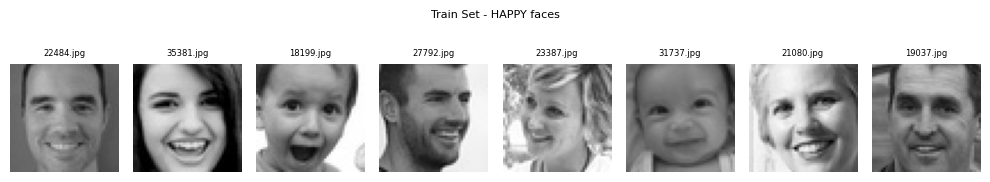

Total files in Train Set - NEUTRAL faces: 3978


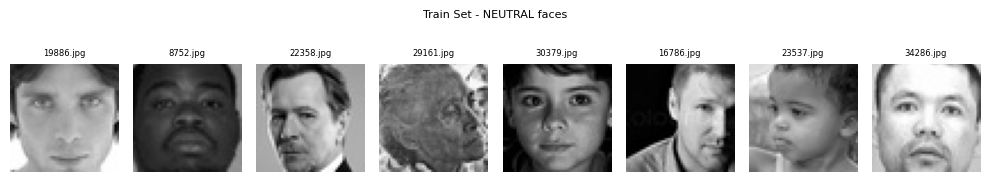

Total files in Train Set - SAD faces: 3982


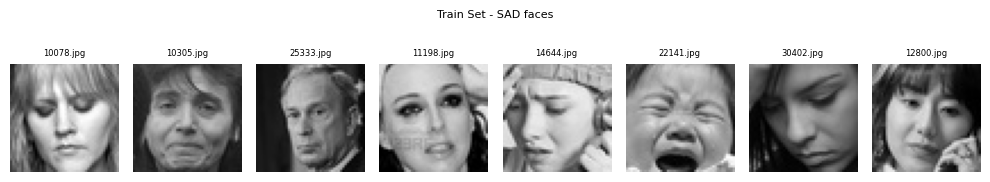

Total files in Train Set - SURPRISE faces: 3173


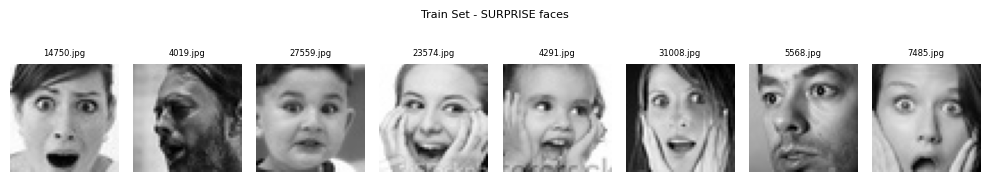

Total images: 15109


In [11]:
title_of_set = 'Train Set'
training_set, feature_train = read_and_display_images_in_set(TRAIN_PATH, title_of_set)

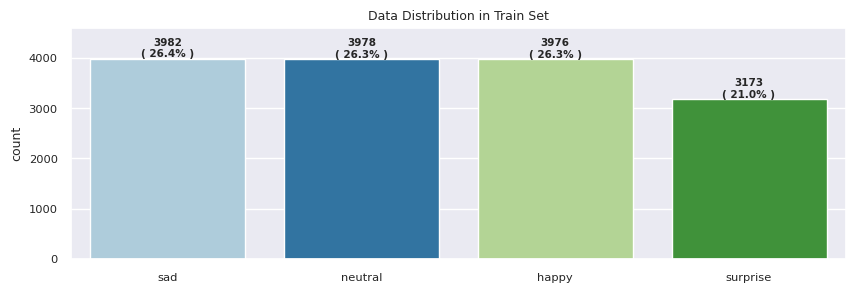

In [12]:
get_feature_countplot(feature_train, title_of_set)

**Testing Set**

Total files in Test Set - HAPPY faces: 32


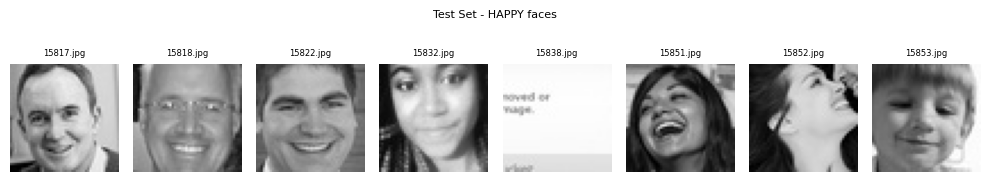

Total files in Test Set - NEUTRAL faces: 32


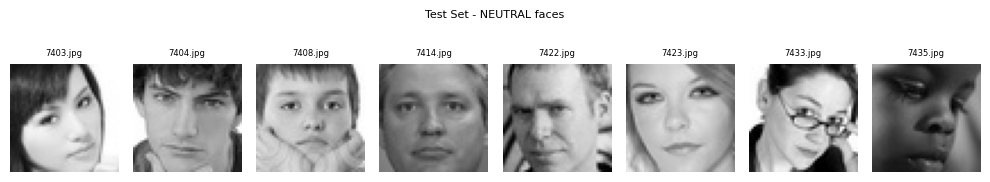

Total files in Test Set - SAD faces: 32


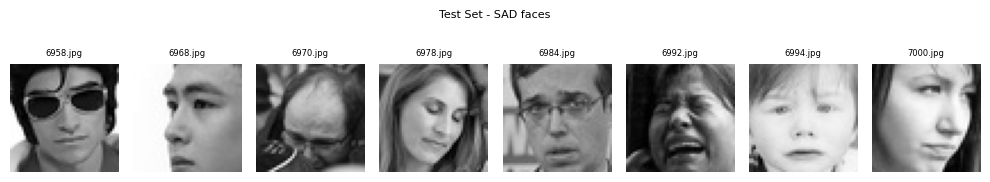

Total files in Test Set - SURPRISE faces: 32


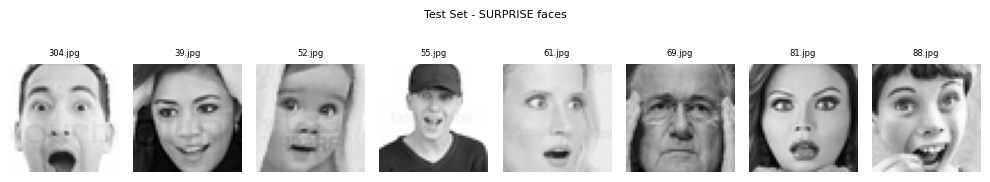

Total images: 128


In [13]:
title_of_set = 'Test Set'
testing_set, feature_test = read_and_display_images_in_set(TEST_PATH, title_of_set, pick_random=False)

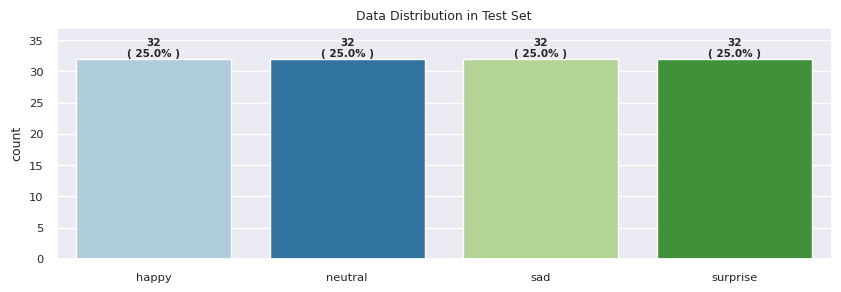

In [14]:
get_feature_countplot(feature_test, title_of_set)

**Validation Set**

Total files in Validation Set - HAPPY faces: 1825


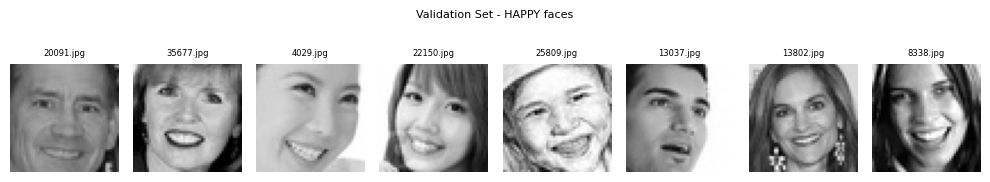

Total files in Validation Set - NEUTRAL faces: 1216


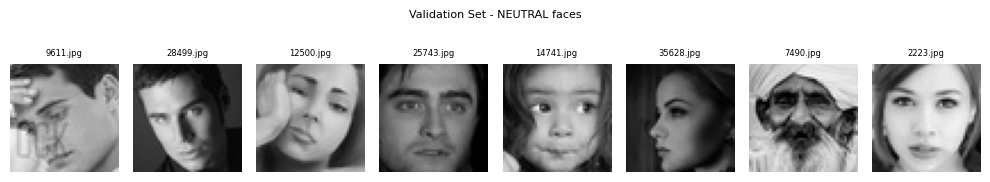

Total files in Validation Set - SAD faces: 1139


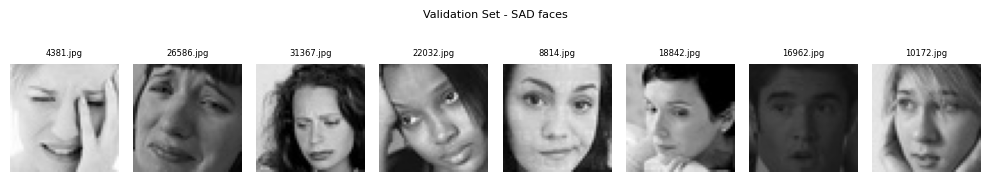

Total files in Validation Set - SURPRISE faces: 797


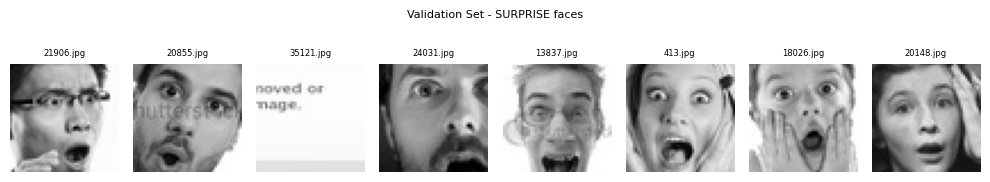

Total images: 4977


In [15]:
title_of_set = 'Validation Set'
validation_set, feature_val = read_and_display_images_in_set(VAL_PATH, title_of_set)

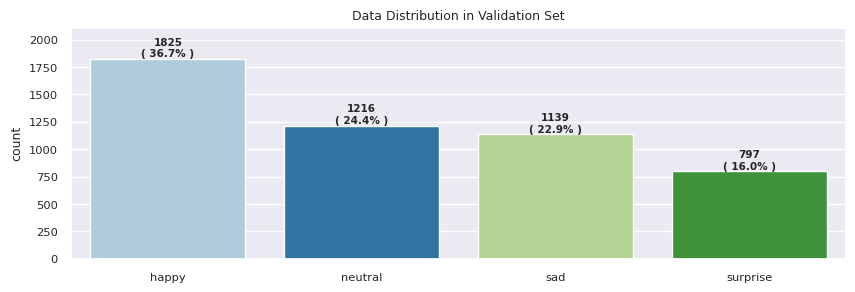

In [16]:
get_feature_countplot(feature_val, title_of_set)

⏩ **Observations and Insights:**

- There are 3 different sets: Training, Testing, and Validation.
- All of them have images for the expressions: Happy, Sad, Surprise, and Neutral.
- Images are in grey but they are coded in 3 channels. It will be explored how having them encoded in just one channel (grayscale ) will affect the model performance. The initial supposition is that images in grayscale (one channel) will speed the process and make the model more efficient in finding features to classify images. In the end, it will be verified this supposition.
- There are 15,109 images in the training set. Although the images for the Surprise expressions are fewer (21%) than the other categories (26%), the difference is not significant. Data is not unbalanced.
- The testing set has few images (128 in total) but they are equally distributed in each expression. However, one image in the testing set (15838.jpg) is not a face. It needs to be removed.
- The validation set has 4,977 images. The distribution is not uniform, the Happy expression Category has more than double the images that the Surprise expression Category has.
- The samples are shown randomly, however, it seems that most of the faces, in the training set, are in front positions, meanwhile in the testing set and in the validation set, the majority of faces are tilted. We can try to fix this when we prepare the image loaders.
- Some images look like they are in the wrong category, for example, image 9984.jpg does not look like a happy face. This image is found in the validation set. This situation is present in all sets: training, testing, and validation. Another image is the 32222.jpg in the training set, which looks like Happy but is in Neutral categories.
- The images in happy class have some unique features like upturned corners of the lips, and the images in surprise also have some unique features like an open mouth in an "o" shape. Meanwhile, the images in the sad have different features, p.e. corners of the lips turned down, frown. With the neutral class, the most common characteristic is lips in a straight line.

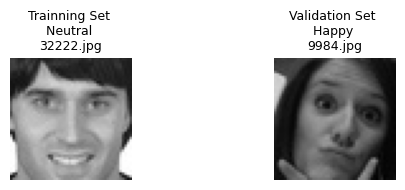

In [17]:
fig = plt.figure(figsize=(6, 2))
ax = plt.subplot(1, 2, 1)
ax.axis('Off')
plt.imshow(load_img(f'{TRAIN_PATH}/neutral/32222.jpg'))
plt.title('Trainning Set \nNeutral \n32222.jpg', fontsize=9)
ax = plt.subplot(1, 2, 2)
ax.axis('Off')
plt.imshow(load_img(f'{VAL_PATH}/happy/9984.jpg'))
plt.title('Validation Set \nHappy \n9984.jpg', fontsize=9)
plt.tight_layout()
plt.show()

In [18]:
# Deleting the wrong images
!rm '/content/Facial_emotion_images/test/happy/15838.jpg'

In [19]:
# Recalculating the testing_set and feature_test
title_of_set = 'Test Set'
testing_set, feature_test = read_and_display_images_in_set(TEST_PATH, title_of_set, show_sample_images=False)

Total files in Test Set - HAPPY faces: 31
Total files in Test Set - NEUTRAL faces: 32
Total files in Test Set - SAD faces: 32
Total files in Test Set - SURPRISE faces: 32
Total images: 127


In [20]:
# Observing the dimenssions of images in each set
def display_dimmension_images_in_set(path, data_set, set_name):
  """Display a scatterplot of images dimmension in the set
  """
  dim = []
  for expression, images in data_set.items():
    files_path = f'{path}/{expression}'
    dim += [(img_to_array(load_img(f'{files_path}/{image}')).shape) for image in images]
    if len(set(map(operator.itemgetter(-1), dim))) == 1:
      print(f'All elements in "{expression}" category has {dim[0][-1]} dimmensions')

  x = list(map(operator.itemgetter(0), dim))
  y = list(map(operator.itemgetter(1), dim))

  fig = plt.figure(figsize=(6, 2))
  plt.scatter(x,y)
  plt.title(set_name)
  plt.show()

All elements in "happy" category has 3 dimmensions
All elements in "neutral" category has 3 dimmensions
All elements in "sad" category has 3 dimmensions
All elements in "surprise" category has 3 dimmensions


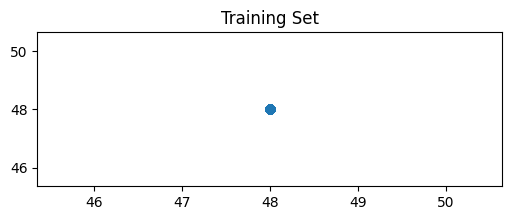

In [21]:
display_dimmension_images_in_set(TRAIN_PATH, training_set, 'Training Set')

All elements in "happy" category has 3 dimmensions
All elements in "neutral" category has 3 dimmensions
All elements in "sad" category has 3 dimmensions
All elements in "surprise" category has 3 dimmensions


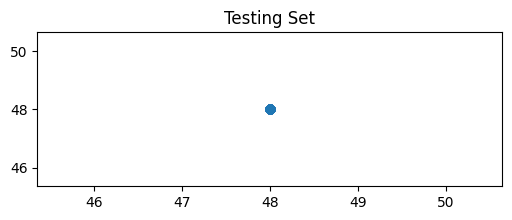

In [22]:
display_dimmension_images_in_set(TEST_PATH, testing_set, 'Testing Set')

All elements in "happy" category has 3 dimmensions
All elements in "neutral" category has 3 dimmensions
All elements in "sad" category has 3 dimmensions
All elements in "surprise" category has 3 dimmensions


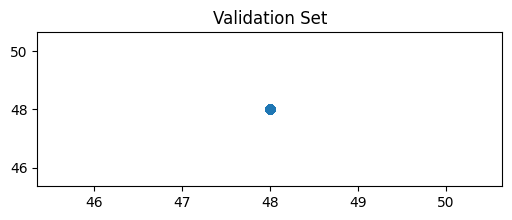

In [23]:
display_dimmension_images_in_set(VAL_PATH, validation_set, 'Validation Set')

### **Checking Distribution of Classes**

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

⏩ **Observations and Insights:**

- The testing dataset is nearly balanced distributed, the differences between the lowest and the highest categories are not significant. We can work with the current testing data.
- The dataset in the validation set, seems not balanced, but this will not affect the training process, so no treatment technique will be applied.
- If we need later to increase the number of images to avoid overfitting, we can use the ImageDataGenerator method as part of the Data Augmentation Technique.
- It was also reviewed the dimmensions of the images. All of them has the same dimmensions: 48 X 48 pixels in 3 channels.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [24]:
def create_data_loaders(path, color_mode, batch_size=64):
  """Create the data loaders for training, testing and validation sets.
     It will be necessary to definte the color mode: rgb or grayscale.
  """
  # All images to be rescaled by 1/255.
  datagen_train = ImageDataGenerator(horizontal_flip = True,
                                     rescale=1./255,
                                     shear_range=0.3)
  datagen_test  = ImageDataGenerator(rescale = 1.0/255.)
  datagen_val  = ImageDataGenerator(rescale = 1.0/255.)

  # Generating the batches od the images
  default_params = {
      'target_size': (48, 48),
      'color_mode' : color_mode,
      'class_mode' : 'categorical',
      'classes'    : FACE_EXPRESSIONS,
      'shuffle'    : True
  }
  print(f'\nData with color_mode={color_mode}:')
  train_generator = datagen_train.flow_from_directory(f'{path}/train', batch_size=batch_size, **default_params)
  test_generator = datagen_train.flow_from_directory(f'{path}/test', batch_size=32, **default_params)
  val_generator = datagen_train.flow_from_directory(f'{path}/validation', batch_size=batch_size, **default_params)

  return train_generator, test_generator, val_generator


Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


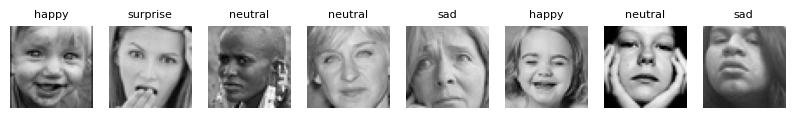

In [25]:
train_generator_rgb, _, _ = create_data_loaders(IMG_DIR, 'rgb')

# Taking a look at some examples of our augmented training data with color_mode='rgb'.
images, labels = next(train_generator_rgb)
fig, axes = plt.subplots(1, 8, figsize = (10, 2))
for (image, label, ax) in zip(images, labels, axes.flatten()):
  ax.imshow(image)
  ax.set_title(FACE_EXPRESSIONS[list(label).index(1)], fontsize=8)
  ax.axis('off')
plt.show()


Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


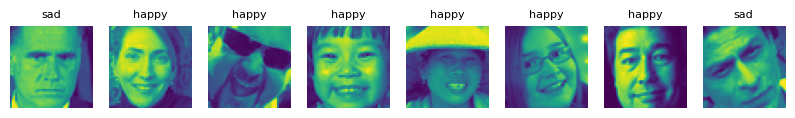

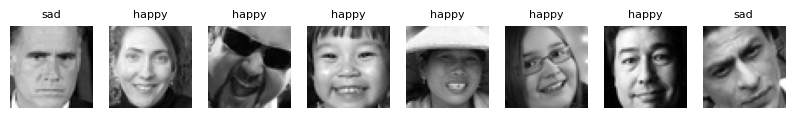

In [26]:
train_generator_gray, _, _ = create_data_loaders(IMG_DIR, 'grayscale')

# Taking a look at some examples of our augmented training data with color_mode='grayscale'.
images, labels = next(train_generator_gray)
fig, axes = plt.subplots(1, 8, figsize = (10, 2))
for (image, label, ax) in zip(images, labels, axes.flatten()):
  ax.imshow(image)
  ax.set_title(FACE_EXPRESSIONS[list(label).index(1)], fontsize=8)
  ax.axis('off')
plt.show()

# Using proper cmap
fig, axes = plt.subplots(1, 8, figsize = (10, 2))
for (image, label, ax) in zip(images, labels, axes.flatten()):
  ax.imshow(image, cmap='gray')
  ax.set_title(FACE_EXPRESSIONS[list(label).index(1)], fontsize=8)
  ax.axis('off')
plt.show()

## **Environment preparation**

In [27]:
def save_object(obj, filename):
  """To save objects that can be loaded later"""
  with open(filename, 'wb') as f:
    pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [28]:
def metrics_score(actual, predicted, model_name, history):
  """Calculating metrics to later compare performance of the model.
  It also prints the classification report and the confusion matrix
  """
  print(classification_report(actual, predicted, zero_division=0, target_names=FACE_EXPRESSIONS))
  cm = confusion_matrix(actual, predicted)

  plt.figure(figsize = (8, 5))
  sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=FACE_EXPRESSIONS, yticklabels=FACE_EXPRESSIONS)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

  # Creating a dataframe of metrics
  index = np.argmax(history.history['val_accuracy'])
  df = pd.DataFrame(
      data={
          "Accuracy Train": history.history['accuracy'][index],
          "Accuracy Val": history.history['val_accuracy'][index],
          "Accuracy Test": accuracy_score(actual, predicted)
      },
      index=[model_name],
  )
  return df

In [29]:
def plot_model_result(result, model_name):
    """    Plot the accuracy and loss values of the model.
    """
    fig = plt.figure(figsize = (10, 3))

    # Plotting the Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # Plotting the Loss
    plt.subplot(1, 2, 2)
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.suptitle(model_name)
    plt.show()

In [30]:
def init_environment():
  # Clearing previous TF sessions
  backend.clear_session()

  # Fixing the seed for random number generators
  os.environ['PYTHONHASHSEED'] = str(2)
  np.random.seed(SEED)
  random.seed(SEED)
  tf.random.set_seed(SEED)
  print('Initializing TF Session and Seed')

⏩ Steps to follow in the model building:

1. Initialize the environment
2. Build the model
3. Compile tne model
4. Train the Model on the training set
5. Evaluate the model on the testing set
6. Tunning if necessary (Repeat steps 2-6)

In [31]:
def model_building_and_evaluating_process(model_builder, model_base_name, batch_size=64,
                                          include_grayscale=True, include_rgb=True, epochs=20, tune=0):
  """Execute the following steps: (1) Initialize the environment, (2) Build and compile the model based on the
  model builder method, (3) Train the model on the trainning set, and (4) Evaluate the model on the testing set
  """
  model_sets = []
  if include_rgb:
    model_sets.append(('RGB',  (48, 48, 3)))
  if include_grayscale:
    model_sets.append(('GRAY', (48, 48, 1)))

  model_metrics = pd.DataFrame({})
  model_history = {}
  fitted_model = {}

  for img_set, input_shape in model_sets:
    model_name = f'{model_base_name} - {img_set}'
    print('---------------------------------------------')
    print(model_name)
    print('---------------------------------------------')

    # Step 1: Initialize the environment
    init_environment()
    train_set, test_set, val_set = create_data_loaders(IMG_DIR, color_mode='rgb' if img_set=='RGB' else 'grayscale',
                                                       batch_size=batch_size)
    X_test, y_test = test_set.next()
    print('\n\n')

    # Step 2: Build and compile the model
    if tune:
      model = model_builder(input_shape=input_shape, tune=tune)
    else:
      model = model_builder(input_shape=input_shape)
    print('\n\n')

    # Step 3: Train the model on the training set
    checkpoint = ModelCheckpoint(f'{MODEL_DIR}/{model_name}.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, restore_best_weights=True)
    reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=0, min_delta=0.0001)

    history = model.fit(train_set,
                        validation_data=val_set,
                        epochs=epochs,
                        callbacks=[early_stopping, checkpoint, reduce_learningrate])
    print('\n\n')

    # Step 4: Evaluate the model on the testing set
    model.evaluate(X_test, y_test, verbose=1)

    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_test = np.argmax(y_test, axis=1)
    print('Actual    :', y_test)
    print('Prediction:', y_pred)
    print('\n\n')

    results = metrics_score(y_test, y_pred, model_name, history)
    model_metrics = pd.concat([model_metrics, results])
    print('\n\n')

    fitted_model[model_name] = model
    model_history[model_name] = history
    plot_model_result(history, model_name)
    print('\n\n')

  return fitted_model, model_metrics, model_history

In [32]:
def loss_and_accuracy_comparisson(model_history, data_type='Training and Validation Set'):
  """Visualizing the loss and the accuracy on the train and the
  validation data for all executed models.
  The "data_type" to plot could be "Training and Validation Set", "Validation Set", "Training Set".
  """

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))

  for model_name, history in model_history.items():
    if data_type in ["Training and Validation Set", "Training Set"]:
      ax1.plot(history.history['accuracy'], ls='-', lw=1, label=f'{model_name}')
    if data_type in ["Training and Validation Set", "Validation Set"]:
      ax1.plot(history.history['val_accuracy'], ls='--', lw=1, label=f'{model_name} val')
    ax1.set_ylabel('Accuracy', fontsize=8)
    ax1.set_xlabel('Epochs', fontsize=8)
    ax1.legend(fontsize=6)
    ax1.set_title('Accuracy Comparisson', fontsize=8)
    ax1.xaxis.set_tick_params(labelsize=7)
    ax1.yaxis.set_tick_params(labelsize=7)

    if data_type in ["Training and Validation Set", "Training Set"]:
      ax2.plot(history.history['loss'], ls='-', lw=1, label=f'{model_name}')
    if data_type in ["Training and Validation Set", "Validation Set"]:
      ax2.plot(history.history['val_loss'], ls='--', lw=1, label=f'{model_name} val')
    ax2.set_ylabel('Loss', fontsize=8)
    ax2.set_xlabel('Epochs', fontsize=8)
    ax2.legend(fontsize=6)
    ax2.set_title('Loss Comparisson', fontsize=8)
    ax2.xaxis.set_tick_params(labelsize=7)
    ax2.yaxis.set_tick_params(labelsize=7)

  fig.suptitle(f'Model Comparisson - {data_type}', fontsize=10)
  plt.tight_layout()
  plt.show()

# **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

⏩ **Insights:**

- For image classification problems, I consider that the CNN (Convolutional Neural Networks) approach is better than the ANN (Artificial Neural Networks) because:
  - CNNs helps us to capture easly the relevant features from an image, ignoring any spatial and translational transformations.
  - With the use of filters in a CNN, the model can reduce the dimensionality of the image and extract only the required information.
  - Also, CNN filters requires less trainable parameters in comparison to the ANN, this mean a computational advantage.


## **Model 1: Base Neural Network**
---



In [33]:
# Model 1: Base Neural Network
def model_builder_base_cnn(input_shape):
  """Creating the Base Neural Network.
  """
  model = Sequential([
      Conv2D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=input_shape),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),
      Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),
      Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),

      Flatten(),
      Dense(512, activation='relu'),
      Dropout(0.4),
      Dense(4, activation='softmax')
  ])

  # Compile model
  optimizer = Adam(learning_rate = 0.001)        # Using SGD Optimizer
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Generating the summary of the model
  print(model.summary())
  return model

---------------------------------------------
Model 1: Base Neural Network (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      

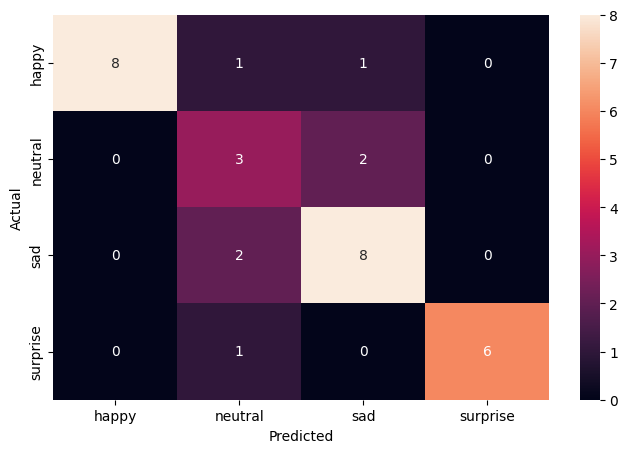

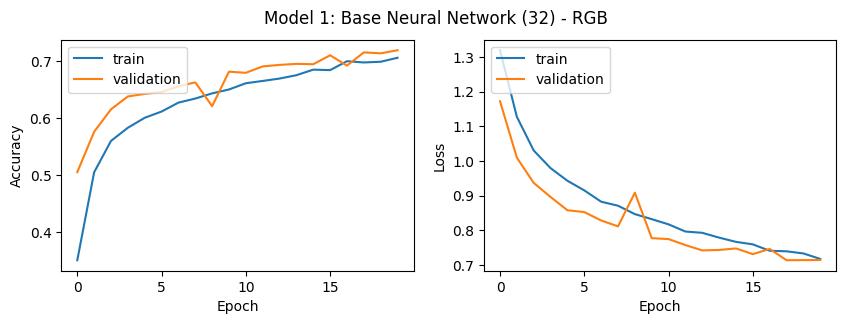




---------------------------------------------
Model 1: Base Neural Network (32) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        

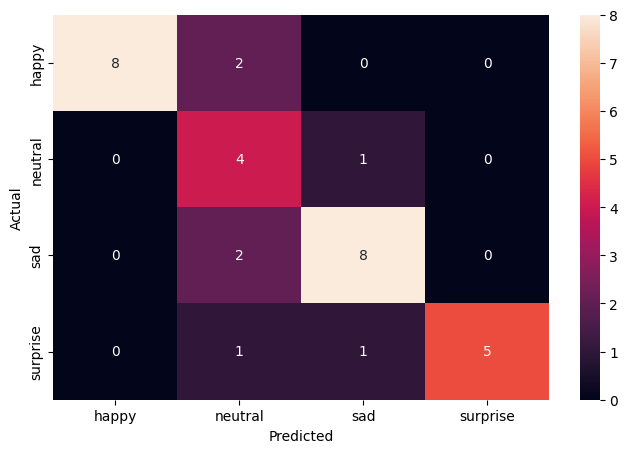

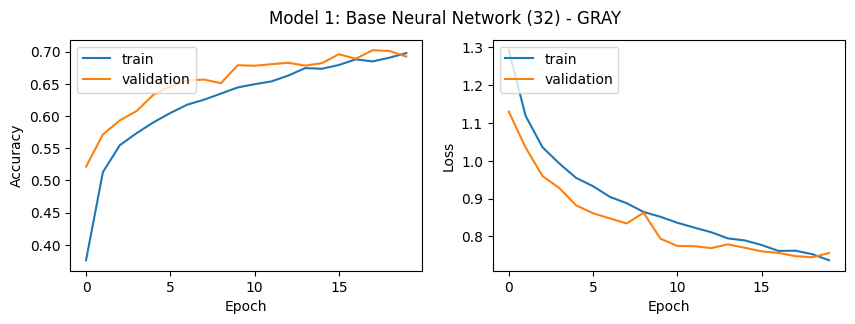

In [34]:
batch_size = 32
model_base_cnn, metrics_base_cnn, history_base_cnn = model_building_and_evaluating_process(
    model_builder_base_cnn, f'Model 1: Base Neural Network ({batch_size})', batch_size=batch_size, epochs=20
)

---------------------------------------------
Model 1: Base Neural Network (64) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      

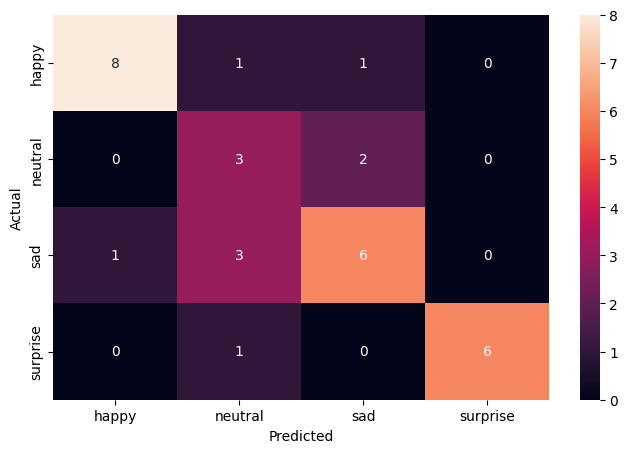

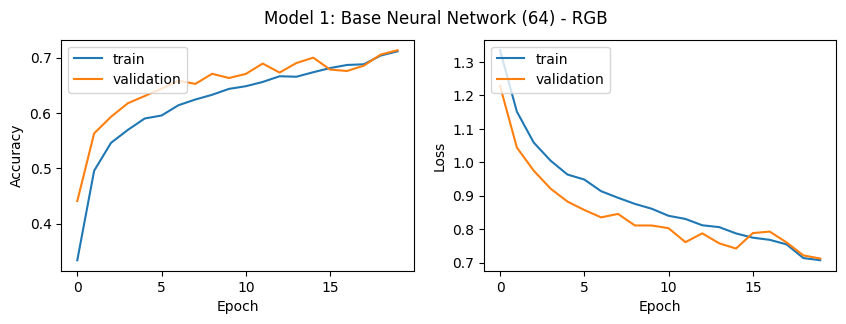




---------------------------------------------
Model 1: Base Neural Network (64) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        

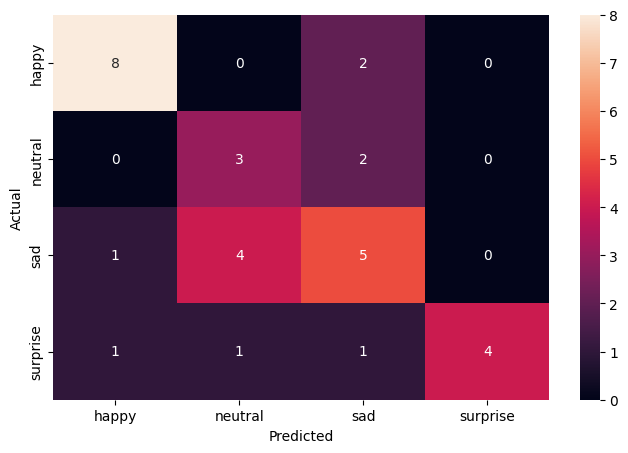

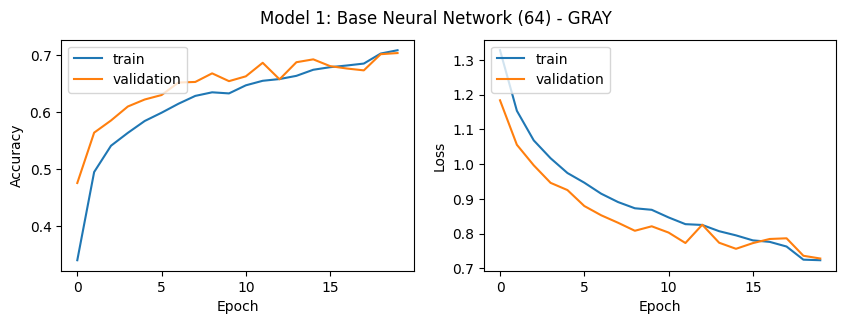

In [35]:
batch_size = 64
model, results, history = model_building_and_evaluating_process(model_builder_base_cnn, f'Model 1: Base Neural Network ({batch_size})',
                                                                batch_size=batch_size, epochs=20)
model_base_cnn.update(model)
metrics_base_cnn = pd.concat([metrics_base_cnn, results])
history_base_cnn.update(history)

---------------------------------------------
Model 1: Base Neural Network (128) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224     

1/1 [==============================] - 0s 86ms/step
Actual    : [0 1 3 0 1 3 2 1 0 2 0 3 2 2 3 0 3 2 0 2 1 3 2 2 0 0 3 0 1 2 0 2]
Prediction: [0 1 3 0 0 3 2 1 0 1 2 3 2 2 3 0 3 2 0 2 2 3 1 2 0 2 1 0 1 1 0 2]



              precision    recall  f1-score   support

       happy       0.89      0.80      0.84        10
     neutral       0.43      0.60      0.50         5
         sad       0.70      0.70      0.70        10
    surprise       1.00      0.86      0.92         7

    accuracy                           0.75        32
   macro avg       0.75      0.74      0.74        32
weighted avg       0.78      0.75      0.76        32



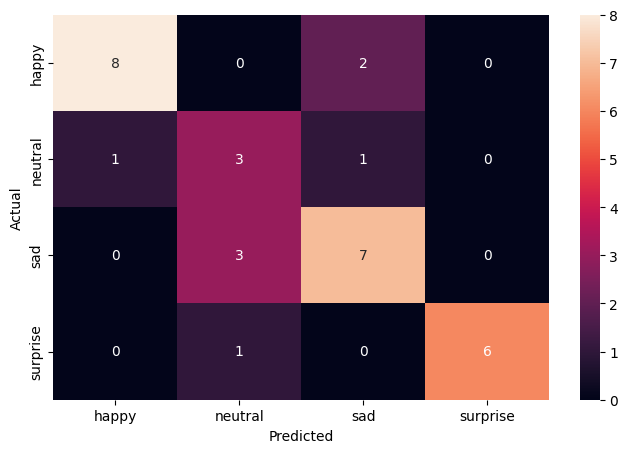

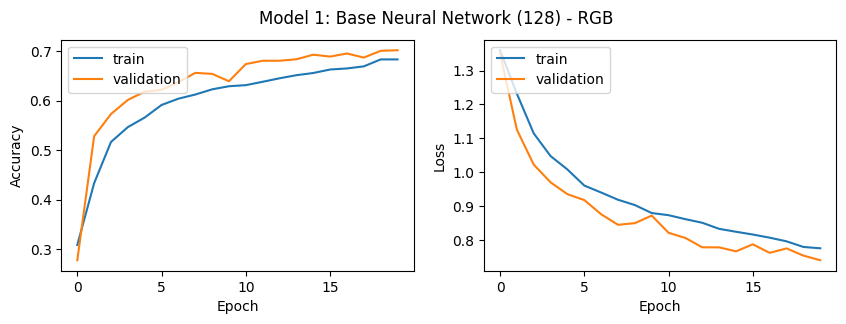




---------------------------------------------
Model 1: Base Neural Network (128) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)       

1/1 [==============================] - 0s 87ms/step
Actual    : [0 1 3 0 1 3 2 1 0 2 0 3 2 2 3 0 3 2 0 2 1 3 2 2 0 0 3 0 1 2 0 2]
Prediction: [0 1 3 0 2 3 2 1 0 1 0 3 2 0 3 0 3 2 2 2 2 3 1 2 0 2 1 0 3 1 0 2]



              precision    recall  f1-score   support

       happy       0.89      0.80      0.84        10
     neutral       0.33      0.40      0.36         5
         sad       0.60      0.60      0.60        10
    surprise       0.86      0.86      0.86         7

    accuracy                           0.69        32
   macro avg       0.67      0.66      0.67        32
weighted avg       0.70      0.69      0.69        32



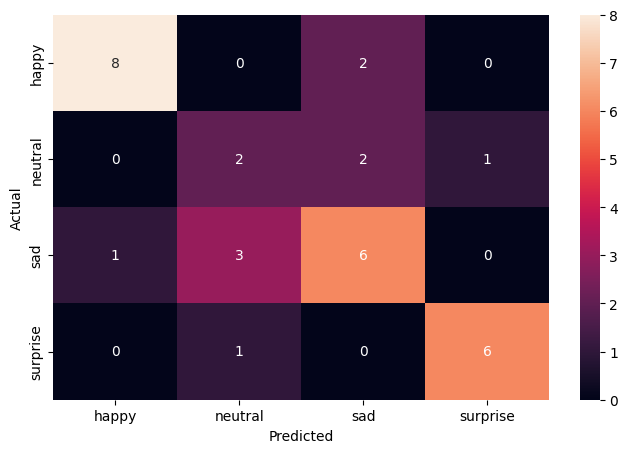

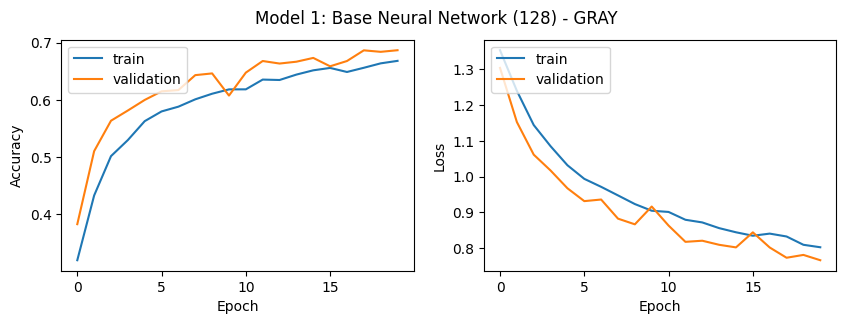

In [36]:
batch_size = 128
model, results, history = model_building_and_evaluating_process(model_builder_base_cnn, f'Model 1: Base Neural Network ({batch_size})',
                                                                batch_size=batch_size, epochs=20)
model_base_cnn.update(model)
metrics_base_cnn = pd.concat([metrics_base_cnn, results])
history_base_cnn.update(history)

In [37]:
model_name = 'Model 1: Base Neural Network'
save_object(history_base_cnn, f'{MODEL_DIR}/{model_name} - history.pkl')
save_object(metrics_base_cnn, f'{MODEL_DIR}/{model_name} - metrics.pkl')
save_object(model_base_cnn, f'{MODEL_DIR}/{model_name} - models.pkl')

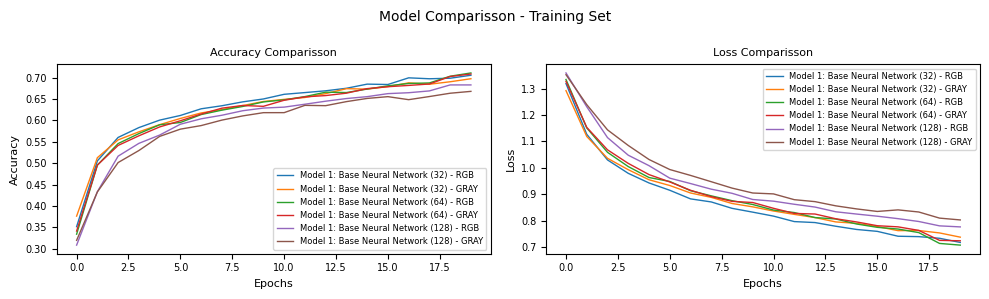

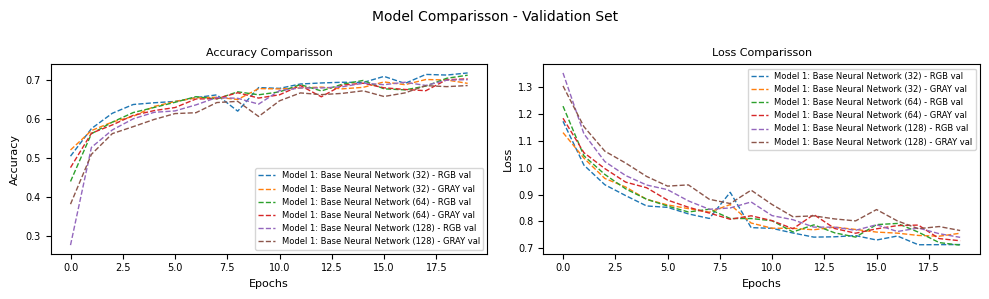

In [38]:
loss_and_accuracy_comparisson(history_base_cnn, data_type='Training Set')
loss_and_accuracy_comparisson(history_base_cnn, data_type='Validation Set')

In [39]:
metrics_base_cnn.style.highlight_max(color = "lightgreen", axis = 0)

⏩ **Observations and Insights:**

- In 20 epochs, this base model has reached over **70% of accuracy** on the validation set for the majority of the cases (just batch size 128 Grayscale got 68.7%), we can confirm that this model performs well. Only the cases with batch_size 128 do not reach 70% of accuracy. When batch size increase, the model speeds the training process but some of the patterns maybe are not be detected, the model probably has more difficulties capturing the patterns in the data. This is a kind of trade-off between speed and learning.
- In all cases, the learning curve reveals that the accuracy on the validation set is slightly better than on the training set. This is probably because the data augmentation technique was applied to the training set, and not applied to the validation set. The model learned multiple features based on the changes produced by the data augmentation technique, making the model significantly more robust.
- Also, the learning curve reflects that model performs similarly in the training and the validation set. Not dealing with overfitting at this level.
- In this model, it was explored different batch_size: 32, 64, and 128 to analyze how affect the model performance. Batch size 32 gives the best results with both sets (RGB and Grayscale).
- With **batch_size = 64**, the model provides similar results to **batch_size = 32**. A valid trade-off, for a probe of concept, could be to use batch_size = 64, to get similar results but in less time. **batch_size = 128** has the worst performance.
- RGB set performed better, accordingly to the validation set result, in all tested batch_size (32, 64, 128).
- Analyzing the classification report, it is discovered that Surprise and Happy are the classes with the best accuracy in the majority of the cases. On the other hand, neutral and sad are with the lowest accuracy in those same cases. Probably, the derived patterns from features present in the images for the Happy and Surprise categories are not common in the other categories, making it easier for the models to identify these classes.
- **The best model "Model 1: Base Neural Network (32) - RGB" achieved 71.9% accuracy. RGB provided the best result.**

⏩ **Recommendations:**
- The learning curve, for "Model 1: Base Neural Network (32) - RGB", seems to be growing, so having more training sessions could be beneficial.
- Explore other image augmentation techniques to provide more data to the model.
- A review of the training dataset is necessary to confirm data are good enough.

## **Model 2: Enhanced Neural Network**
---



In [40]:
# Model 2: Enhanced Neural Network
def model_builder_enhanced_cnn(input_shape):
  """Creating an Enhanced Neural Network.
  """
  model = Sequential([
      Conv2D(filters=256, kernel_size=2, activation='relu', padding='same', input_shape=input_shape),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Conv2D(filters=64, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Conv2D(filters=32, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),

      Flatten(),
      Dense(512, activation='relu'),
      Dense(128, activation='relu'),
      Dense(4, activation='softmax')
  ])

  # Compile model
  optimizer = Adam(learning_rate = 0.01)        # Using SGD Optimizer
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Generating the summary of the model
  print(model.summary())
  return model

---------------------------------------------
Model 2: Enhanced Neural Network (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0     

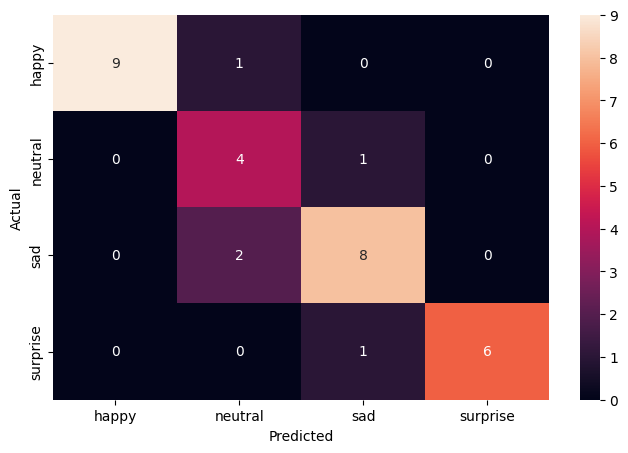

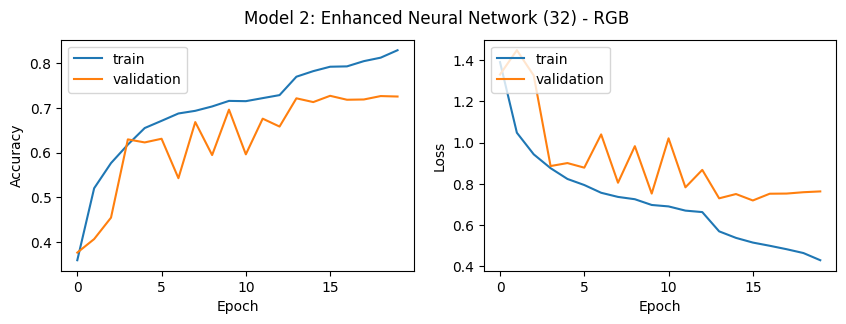




---------------------------------------------
Model 2: Enhanced Neural Network (32) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)  

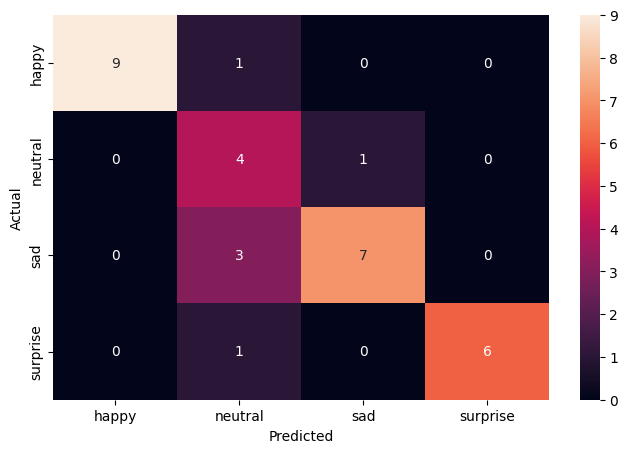

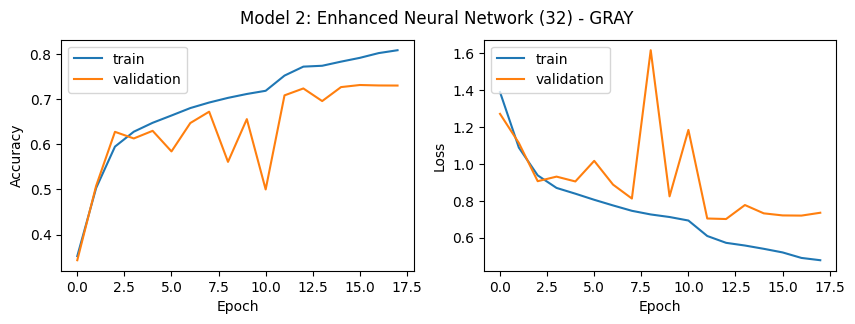

In [41]:
batch_size = 32
model_enhanced_cnn, metrics_enhanced_cnn, history_enhanced_cnn = model_building_and_evaluating_process(
    model_builder_enhanced_cnn, f'Model 2: Enhanced Neural Network ({batch_size})', batch_size=batch_size, epochs=20
)

---------------------------------------------
Model 2: Enhanced Neural Network (64) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0     

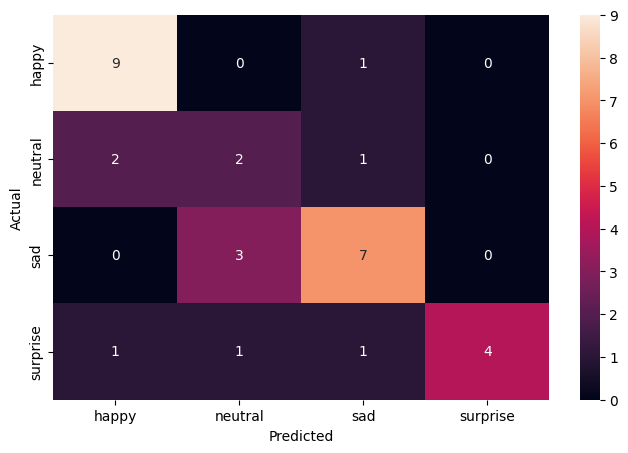

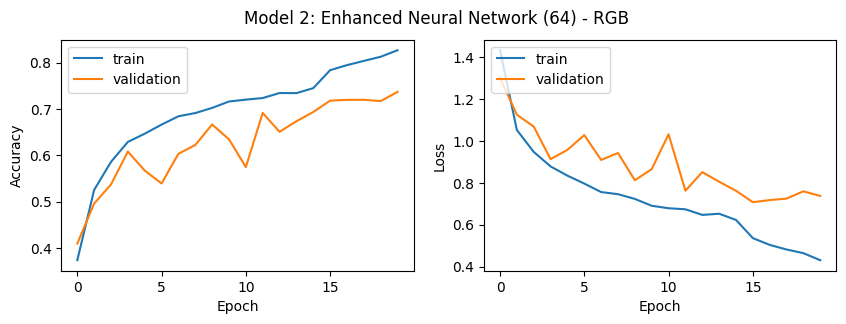




---------------------------------------------
Model 2: Enhanced Neural Network (64) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)  

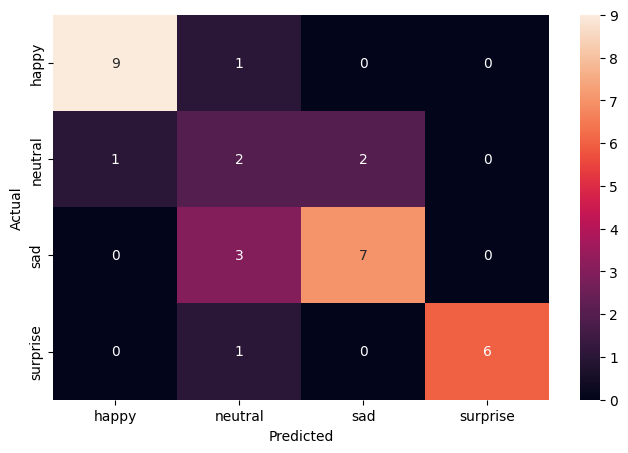

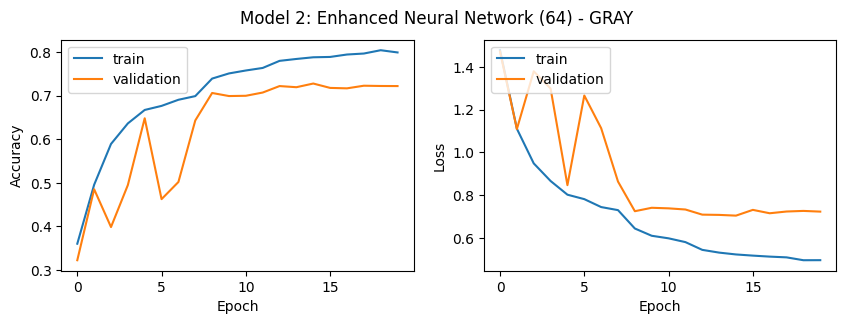

In [42]:
batch_size = 64
model, results, history = model_building_and_evaluating_process(model_builder_enhanced_cnn, f'Model 2: Enhanced Neural Network ({batch_size})',
                                                                batch_size=batch_size, epochs=20)
model_enhanced_cnn.update(model)
metrics_enhanced_cnn = pd.concat([metrics_enhanced_cnn, results])
history_enhanced_cnn.update(history)

---------------------------------------------
Model 2: Enhanced Neural Network (128) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0    

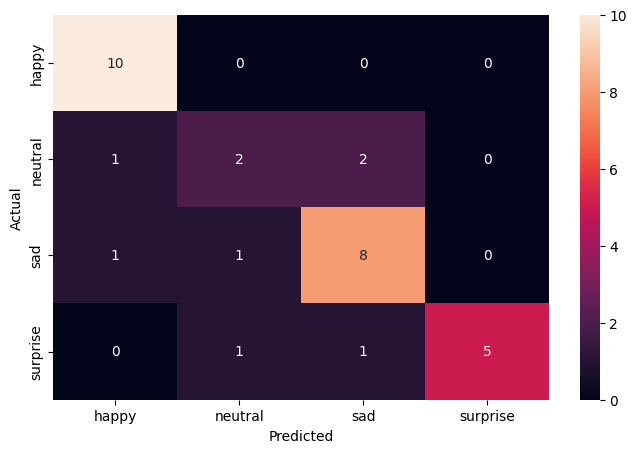

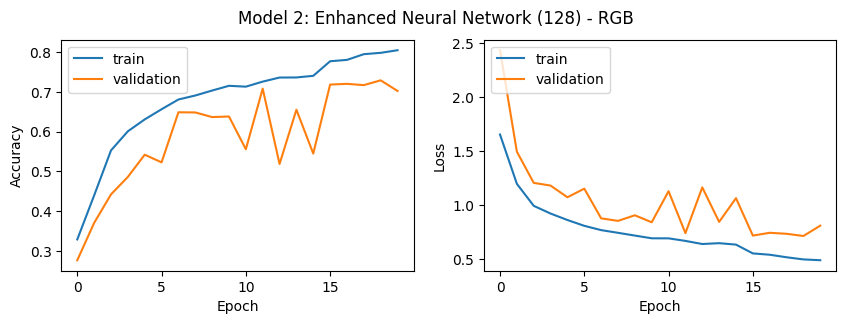




---------------------------------------------
Model 2: Enhanced Neural Network (128) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256) 

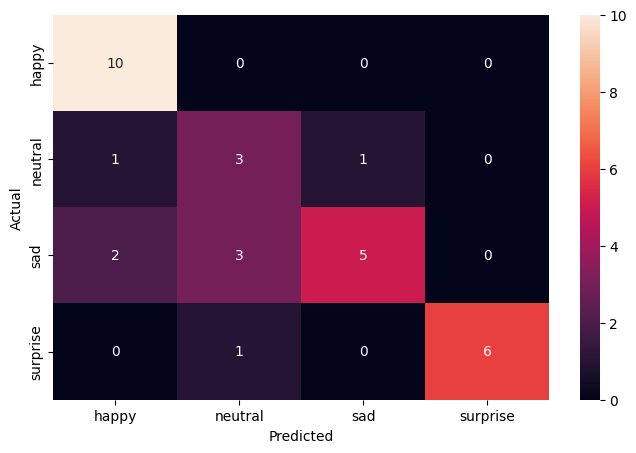

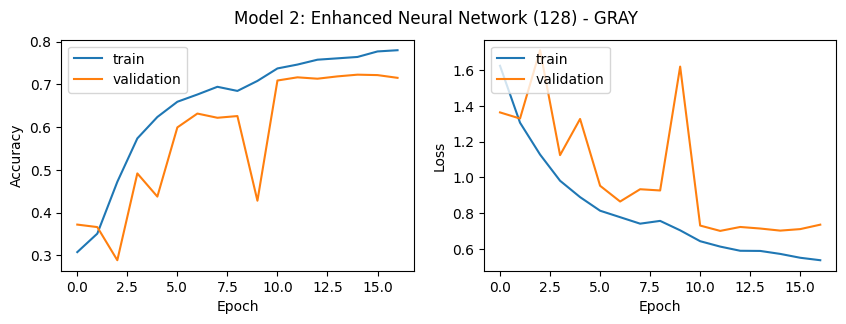

In [43]:
batch_size = 128
model, results, history = model_building_and_evaluating_process(model_builder_enhanced_cnn, f'Model 2: Enhanced Neural Network ({batch_size})',
                                                                batch_size=batch_size, epochs=20)
model_enhanced_cnn.update(model)
metrics_enhanced_cnn = pd.concat([metrics_enhanced_cnn, results])
history_enhanced_cnn.update(history)

In [44]:
model_name = 'Model 2: Enhanced Neural Network'
save_object(history_enhanced_cnn, f'{MODEL_DIR}/{model_name} - history.pkl')
save_object(metrics_enhanced_cnn, f'{MODEL_DIR}/{model_name} - metrics.pkl')
save_object(model_enhanced_cnn, f'{MODEL_DIR}/{model_name} - models.pkl')

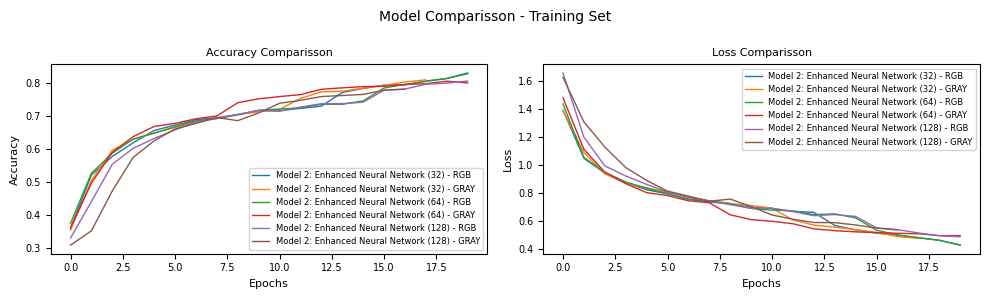

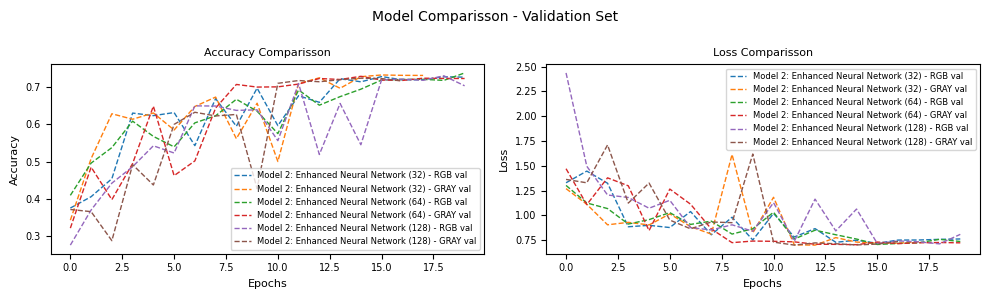

In [45]:
loss_and_accuracy_comparisson(history_enhanced_cnn, data_type='Training Set')
loss_and_accuracy_comparisson(history_enhanced_cnn, data_type='Validation Set')

In [46]:
metrics_enhanced_cnn.style.highlight_max(color = "lightgreen", axis = 0)

⏩ **Observations and Insights:**

- This second model, a kind of enhanced neural network, provided better results (73.7% accuracy in the best case and 72.3% in the worst case), however, the learning curve shows overfitting. Probably adding some Dropout layers will help us to deal with this.
- In this model, it is observed again that batch_size 32 and 64 are the best models. On the next prepared models, batch_size = 32 will be the only selected option, as it is confirmed that this model gives a consistently good result.
- The classification report provides interesting facts: Surprise and Happy are the best evaluated classess, reaching more than 90% in the majority of cases. Sad and Neutral are the classes with the lower accuracy. The complexity of this model is detecting better the features of each class and at the same time learning the noise of the training set. This overfitting needs to be treated, but this model looks promising.
- **The best model "Model 2: Enhanced Neural Network (64) - RGB" achieved 73.7% accuracy. RGB set provided the best result.**

⏩ **Recommendations:**
- Technique to deal with the overfitting needs to be applied to the model "Model 2: Enhanced Neural Network (64) - RGB" and see if this improves the result in the validation set.
- Explore other image augmentation techniques to provide more data to the model.
- A review of the training dataset is necessary to confirm data are good enough.

**Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

⏩ **Observations and Insights:**

- Comparing the performance of the models so far ("Model 1: Base Neural Network (64) - GRAY" and "Model 2: Enhanced Neural Network (32) - RGB"), they are having a good performance, 70.8%, and 73.6% respectively. However the second model shows overfitting, maybe some regularization technique will be necessary (oversampling, dropout, batchnormalization, etc).
- In "Model 1: Base Neural Network (64) - GRAY" the Grayscale set provides the best result. In "Model 2: Enhanced Neural Network (32) - RGB" RGB provides the best result, however, the difference with the grayscale set is not big enough.
- In regards to which color mode could be better, will depend on the data itself and on the model that will be applied. If our data are grayscale images encoded in one channel, transforming it to have RGB will not provide any additional meaningful information to the model. Color always means more computational resources, but some models work better with them. This can be a kind of trade-off between speed and accuracy learning.


# **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.


Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


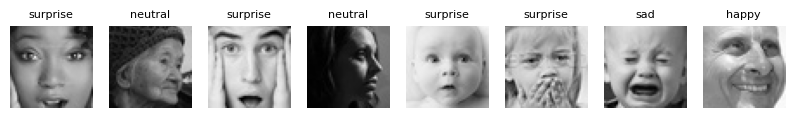

In [47]:
train_generator_rgb, _, _ = create_data_loaders(IMG_DIR, 'rgb')

# Taking a look at some examples of our augmented training data with color_mode='rgb'.
images, labels = next(train_generator_rgb)
fig, axes = plt.subplots(1, 8, figsize = (10, 2))
for (image, label, ax) in zip(images, labels, axes.flatten()):
  ax.imshow(image)
  ax.set_title(FACE_EXPRESSIONS[list(label).index(1)], fontsize=8)
  ax.axis('off')
plt.show()

## **Model 3: VGG16**
---

In [48]:
VGG16(weights='imagenet', include_top=False, input_shape = (48, 48, 3)).summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [49]:
# Model 3: VGG16
def model_builder_vgg16(input_shape, tune=0):
  """Transfer approach with the VGG16 Model
  """
  vgg_model = VGG16(weights='imagenet', include_top=False, input_shape = input_shape)
  # Making all the layers of the VGG model non-trainable
  if tune > 0:
    for layer in vgg_model.layers[:-tune]:
        layer.trainable = False
  else:
    for layer in vgg_model.layers:
        layer.trainable = False

  model = Sequential([
      vgg_model,
      Flatten(),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dropout(0.3),
      Dense(64, activation='relu'),
      BatchNormalization(),
      Dense(4, activation='softmax')
  ])

  # Compile model
  optimizer = Adam(learning_rate = 0.001)        # Using SGD Optimizer
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Generating the summary of the model
  print(model.summary())
  return model

---------------------------------------------
Model 3: VGG16 (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dro

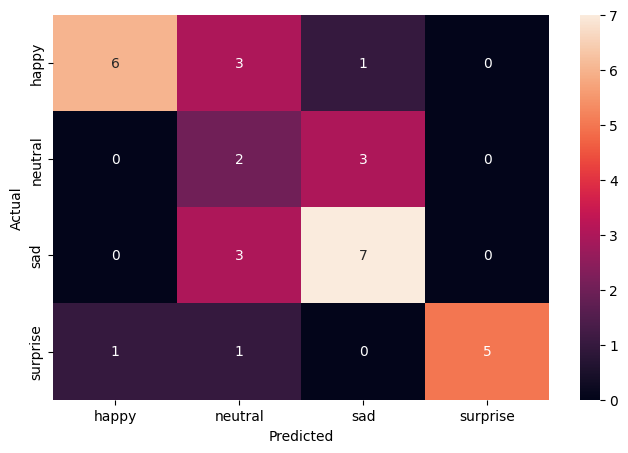

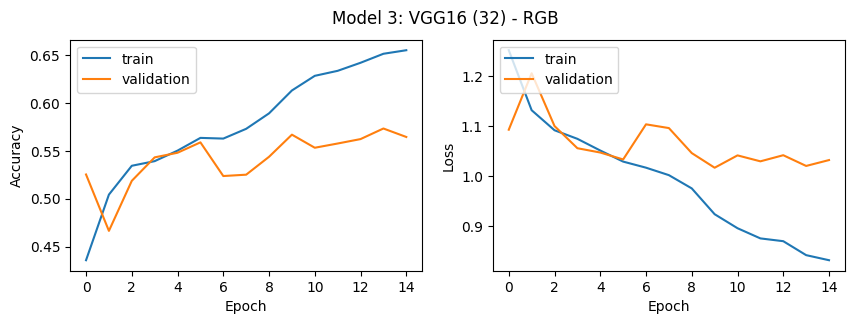

In [50]:
batch_size = 32
model_vgg16, metric_vgg16, history_vgg16 = model_building_and_evaluating_process(
    model_builder_vgg16, f'Model 3: VGG16 ({batch_size})', batch_size=batch_size, epochs=20, include_grayscale=False
)
# model_vgg16['Model 3: VGG16 (32) - RGB'].get_metrics_result()['accuracy'].numpy()

---------------------------------------------
Model 3: Tuned VGG16 (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropou

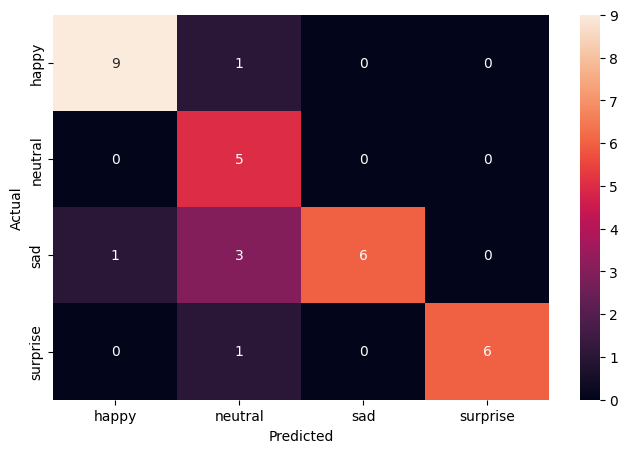

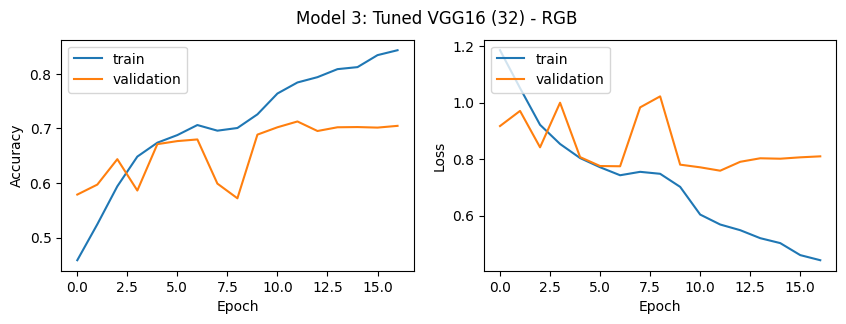

In [51]:
# Let's try again tuning some of the last layers in the transfer model
batch_size = 32
model, results, history = model_building_and_evaluating_process(model_builder_vgg16, f'Model 3: Tuned VGG16 ({batch_size})',
                                                                batch_size=batch_size, epochs=20, tune=4, include_grayscale=False)
model_vgg16.update(model)
metric_vgg16 = pd.concat([metric_vgg16, results])
history_vgg16.update(history)

In [52]:
model_name = 'Model 3: VGG16'
save_object(history_vgg16, f'{MODEL_DIR}/{model_name} - history.pkl')
save_object(metric_vgg16, f'{MODEL_DIR}/{model_name} - metrics.pkl')
save_object(model_vgg16, f'{MODEL_DIR}/{model_name} - models.pkl')

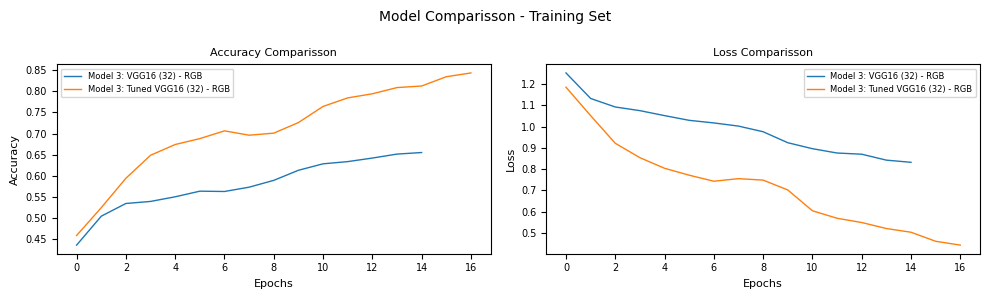

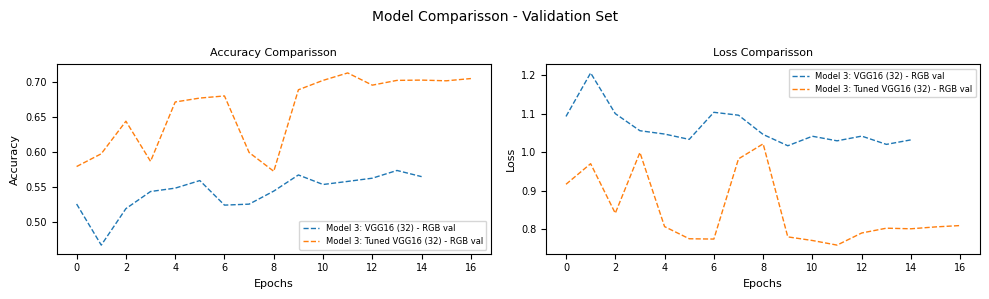

In [53]:
loss_and_accuracy_comparisson(history_vgg16, data_type='Training Set')
loss_and_accuracy_comparisson(history_vgg16, data_type='Validation Set')

In [54]:
metric_vgg16.style.highlight_max(color = "lightgreen", axis = 0)

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

⏩ **Observations and Insights:**

- The VGG16 is a convolutional neural network model that's used for image recognition. This neural network was trained on more than a million images from the ImageNet database.
- For the current approach in model no. 3, it was taken from VGG16 the convolutional layers block (18 layers), and joined to the classification layers composed mainly of Dense layers, the idea was to verify if this approach improves the results obtained with the previous models.
- On the first try, it was turned the trainable property of all the convolutional layers (extracted from VGG16), to False, so it was ensured that the weight learned in VGG16 will be applied to the new problem. This provided 57.3% of accuracy, not good at all.
- In the second try, the trainable property = False was not applied to all convolutional layers and when the model was compiled it allows the backpropagation to update the last 4 pre-trained layers. The 4 last convolutional layers were trained with the data to help the model learn specific features from the data in this specific image classification problem. This second try achieved 71.3% of accuracy. This tuning improves the performance of the model.
- The learning curve reflects overfitting, it is necessary to explore if adding Dropout layers just after the convolutional layers could help to deal with this problem.
- Although the result of "Model 3: Tuned VGG16 (32) - RGB" is lower than the obtained of the previous models ("Model 1: Base Neural Network (32) - RGB" and "Model 2: Enhanced Neural Network (64) - RGB"), the general performance in the training model is higher.
- Happy and Surprise are the best-evaluated classes. Neutral and Sad are the classes with the lowest performance.
- **The best model "Model 3: Tuned VGG16 (32) - RGB" achieved 71.3% accuracy.**

⏩ **Recommendations:**
- Technique to deal with the overfitting needs to be applied to the model "Model 3: Tuned VGG16 (32) - RGB" and see if this improves the result in the validation set.
- Explore other image augmentation techniques to provide more data to the model.
- A review of the training dataset is necessary to confirm data are good enough.

## **Model 4: ResNet V2**
---


- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [55]:
ap.ResNet101(include_top=False, weights="imagenet", input_shape=(48, 48, 3)).summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

In [56]:
# Model 4: ResNet V2
def model_builder_resnet(input_shape, tune=0):
  """Transfer approach with the ResNet V2
  """
  resnet_model = ap.ResNet101(include_top=False, weights="imagenet", input_shape=input_shape)
  # Making all the layers of the VGG model non-trainable
  if tune > 0:
    for layer in resnet_model.layers[:-tune]:
        layer.trainable = False
  else:
    for layer in resnet_model.layers:
        layer.trainable = False

  model = Sequential([
      resnet_model,
      Flatten(),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dropout(0.3),
      Dense(64, activation='relu'),
      BatchNormalization(),
      Dense(4, activation='softmax')
  ])

  # Compile model
  optimizer = Adam(learning_rate = 0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Generating the summary of the model
  print(model.summary())
  return model

---------------------------------------------
Model 4: Resnet V2 (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2, 2, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout 

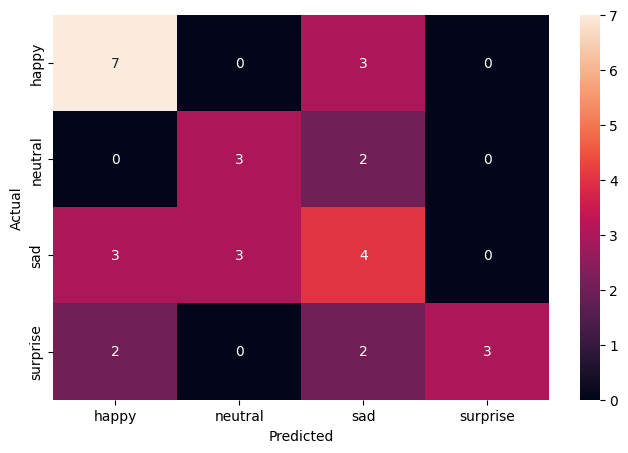

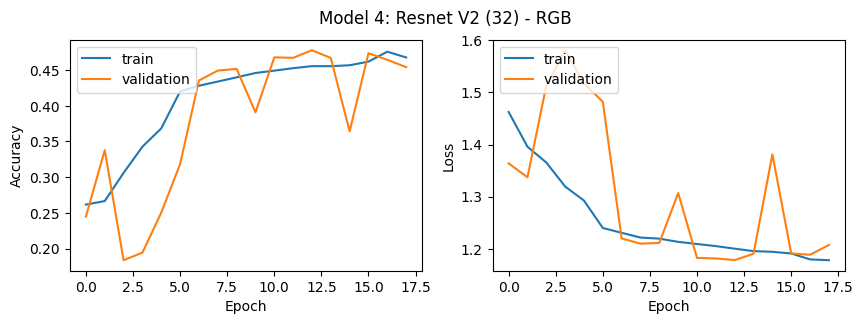

In [57]:
batch_size = 32
model_resnet, metric_resnet, history_resnet = model_building_and_evaluating_process(
    model_builder_resnet, f'Model 4: Resnet V2 ({batch_size})', batch_size=batch_size, epochs=20, include_grayscale=False
)

---------------------------------------------
Model 4: Tuned Resnet V2 (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2, 2, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dr

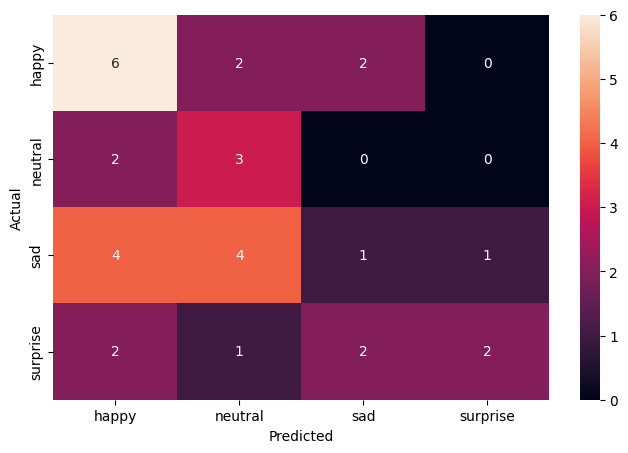

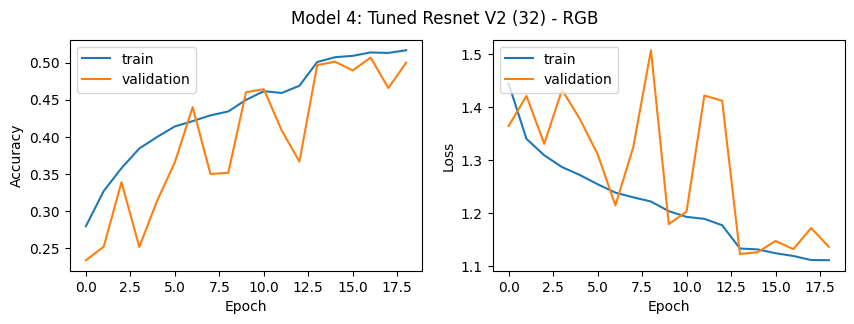

In [58]:
# Let's try again tuning some of the last layers in the transfer model
batch_size = 32
model, results, history = model_building_and_evaluating_process(model_builder_resnet, f'Model 4: Tuned Resnet V2 ({batch_size})',
                                                                batch_size=batch_size, epochs=20, tune=5, include_grayscale=False)
model_resnet.update(model)
metric_resnet = pd.concat([metric_resnet, results])
history_resnet.update(history)

In [59]:
model_name = 'Model 4: Resnet V2'
save_object(history_resnet, f'{MODEL_DIR}/{model_name} - history.pkl')
save_object(metric_resnet, f'{MODEL_DIR}/{model_name} - metrics.pkl')
save_object(model_resnet, f'{MODEL_DIR}/{model_name} - models.pkl')

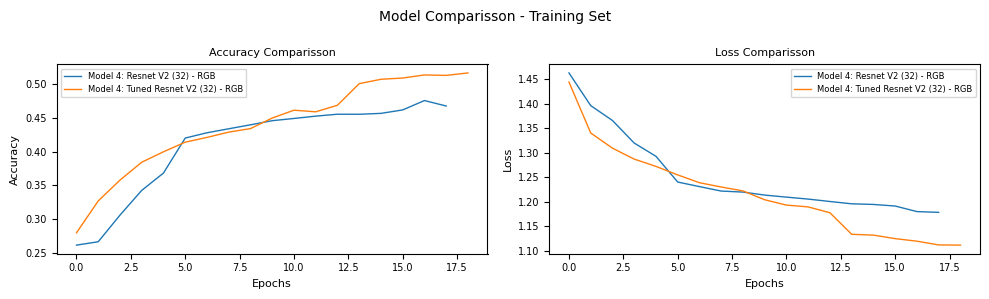

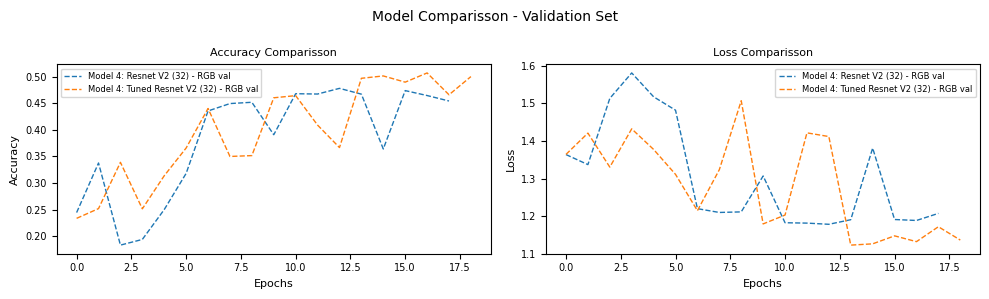

In [60]:
loss_and_accuracy_comparisson(history_resnet, data_type='Training Set')
loss_and_accuracy_comparisson(history_resnet, data_type='Validation Set')

In [61]:
metric_resnet.style.highlight_max(color = "lightgreen", axis = 0)

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

⏩ **Observations and Insights:**

- The Resnet V2 is a convolutional neural network model that's used for image classification. This neural network was trained on more than a million images from the ImageNet database.
- For the current approach in model no. 4, it was taken from Resnet V2 the convolutional layers block (546 layers), and joined to the classification layers composed mainly of Dense layers, the idea was to verify if this approach improves the results obtained with the previous models.
- On the first try, it was turned the trainable property of all the convolutional layers (extracted from Resnet V2), to False, so it was ensured that the weight learned in Resnet V2 will be applied to the new problem. This provided 47.8% of accuracy, not good at all.
- In the second try, the trainable property = False was not applied to all convolutional layers and when the model was compiled it allows the backpropagation to update the last 5 pre-trained layers. The 5 last convolutional layers were trained with the data to help the model learn specific features from the data in this specific image classification problem. This second try achieved 50.7% of accuracy. This tuning improves the performance of the model. Probably a bigger tune number will provide better results. However the results in the testing set are very lower.
- The learning curve reflects a lot of peaks in the validation performance, maybe because of overfitting. It is necessary to explore if adding Dropout layers just after the convolutional layers could help to deal with this problem.
- Happy and Surprise are the best-evaluated classes. Neutral and Sad are the classes with the lowest performance.
- **The best model "Model 4: Tuned Resnet V2 (32) - RGB" achieved 50.7% accuracy.**

⏩ **Recommendations:**
- Increase the number of convolutional layers to retrain with the data, by increasing the tune parameter in the created method "model_builder_resnet".
- Technique to deal with the overfitting needs to be applied to the model "Model 4: Tuned Resnet V2 (32) - RGB" and see if this improves the result in the validation set.
- Explore other image augmentation techniques to provide more data to the model.
- A review of the training dataset is necessary to confirm data are good enough.

## **Model 5: EfficientNet**
---

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [62]:
ap.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape=(48, 48, 3)).summary()

35839040/35839040 [==============================] - 1s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

In [63]:
# Model 5: EfficientNet
def model_builder_efficientnet(input_shape, tune=0):
  """Transfer approach with the EfficientNet Model
  """
  efficientnet_model = ap.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape=input_shape)
  # Making all the layers of the VGG model non-trainable
  if tune > 0:
    for layer in efficientnet_model.layers[:-tune]:
        layer.trainable = False
  else:
    for layer in efficientnet_model.layers:
        layer.trainable = False

  model = Sequential([
      efficientnet_model,
      Flatten(),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dropout(0.3),
      Dense(64, activation='relu'),
      BatchNormalization(),
      Dense(4, activation='softmax')
  ])

  # Compile model
  optimizer = Adam(learning_rate = 0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Generating the summary of the model
  print(model.summary())
  return model

---------------------------------------------
Model 5: EfficientNet (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 2, 2, 1408)       8769374   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 5632)              0         
                                                                 
 dense (Dense)               (None, 256)               1442048   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
      

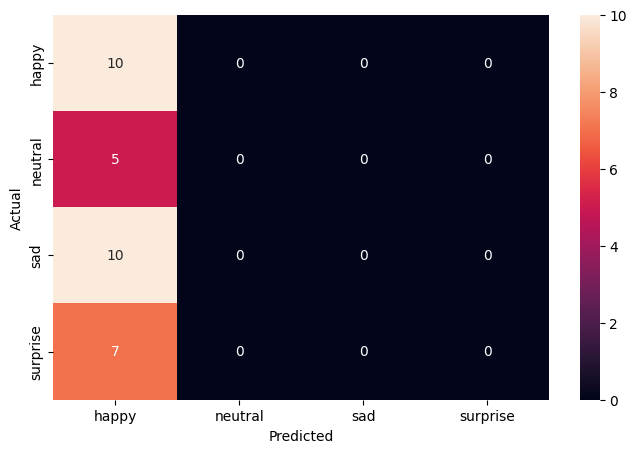

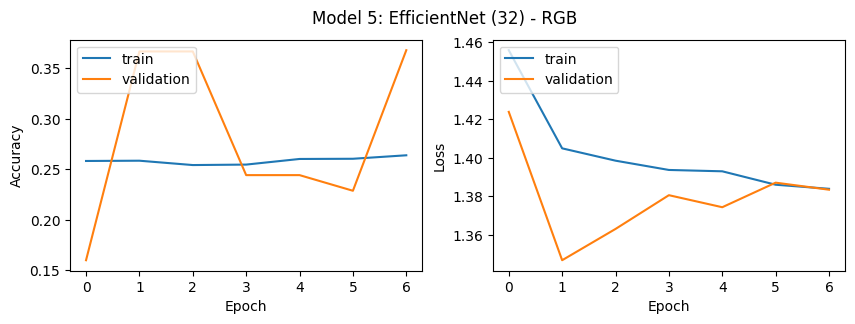

In [64]:
batch_size = 32
model_efficientnet, metric_efficientnet, history_efficientnet = model_building_and_evaluating_process(
    model_builder_efficientnet, f'Model 5: EfficientNet ({batch_size})', batch_size=batch_size, epochs=20, include_grayscale=False
)

---------------------------------------------
Model 5: Tuned EfficientNet (32) - RGB
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=rgb:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 2, 2, 1408)       8769374   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 5632)              0         
                                                                 
 dense (Dense)               (None, 256)               1442048   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     


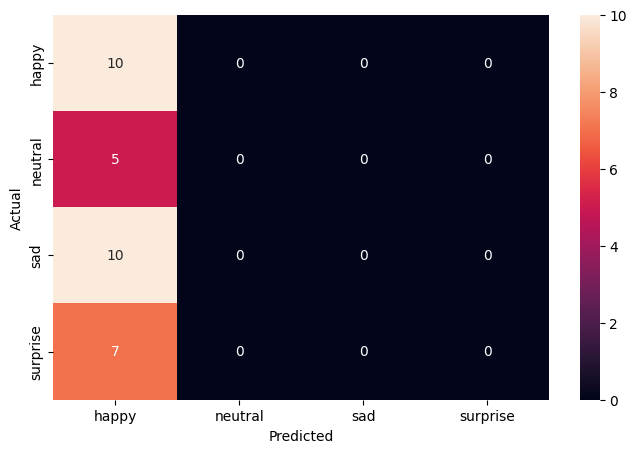

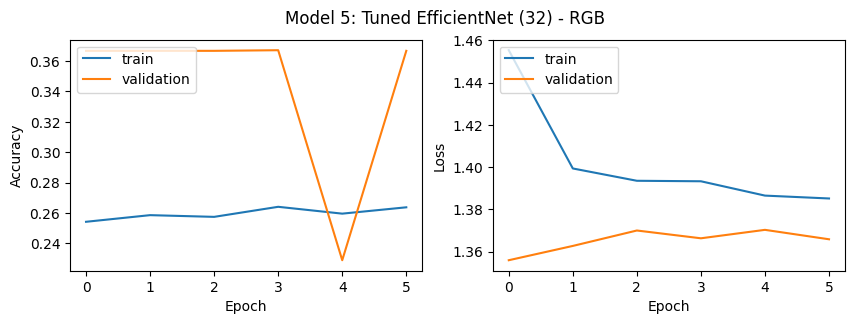

In [65]:
# Let's try again tuning some of the last layers in the transfer model
batch_size = 32
model, results, history = model_building_and_evaluating_process(model_builder_efficientnet, f'Model 5: Tuned EfficientNet ({batch_size})',
                                                                batch_size=batch_size, epochs=20, tune=7, include_grayscale=False)
model_efficientnet.update(model)
metric_efficientnet = pd.concat([metric_efficientnet, results])
history_efficientnet.update(history)

In [66]:
model_name = 'Model 5: EfficientNet'
save_object(history_efficientnet, f'{MODEL_DIR}/{model_name} - history.pkl')
save_object(metric_efficientnet, f'{MODEL_DIR}/{model_name} - metrics.pkl')
save_object(model_efficientnet, f'{MODEL_DIR}/{model_name} - models.pkl')

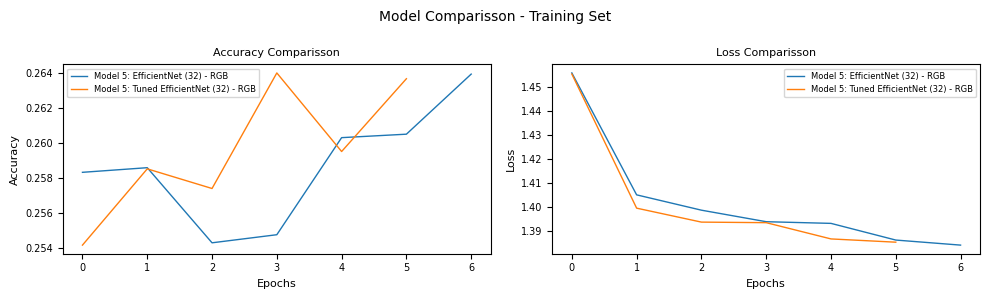

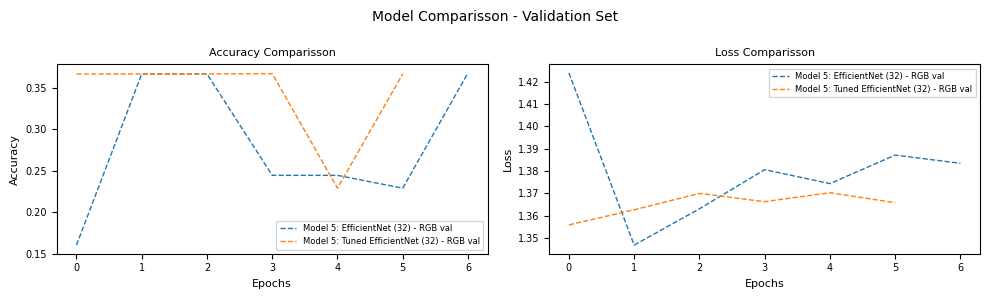

In [67]:
loss_and_accuracy_comparisson(history_efficientnet, data_type='Training Set')
loss_and_accuracy_comparisson(history_efficientnet, data_type='Validation Set')

In [68]:
metric_efficientnet.style.highlight_max(color = "lightgreen", axis = 0)

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

⏩ **Observations and Insights:**

- The EfficientNet is a type of Neural Network architecture that uses compound Scaling to enable better performance on the ImageNet classification task.
- For the current approach in model no. 5, it was taken from EfficientNet the convolutional layers block (561 layers), and joined to the classification layers composed mainly of Dense layers, the idea was to verify if this approach improves the results obtained with the previous models.
- On the first try, it was turned the trainable property of all the convolutional layers (extracted from EfficientNet), to False, so it was ensured that the weight learned in EfficientNet will be applied to the new problem. This provided 36.8% of accuracy, not good at all.
- In the second try, the trainable property = False was not applied to all convolutional layers and when the model was compiled it allows the backpropagation to update the last 7 pre-trained layers. The 7 last convolutional layers were trained with the data to help the model learn specific features from the data in this specific image classification problem. This second try achieved similar results: 36.7% of accuracy. No improvement at all, if we review the predicted class in the testing validation, all values are the same, meaning that this model could not reveal the features and learn to have a good performance.
- The learning curve reflects underfitting, the model is not learning the features of the dataset. Increasing the layers at the end of the convolutional block to retrain is advisable to try to improve its performance.
- **The best model "Model 5: EfficientNet (32) - RGB" achieved 36.8% accuracy.**

⏩ **Recommendations:**
- Increase the number of convolutional layers to retrain with the data, by increasing the "tune" parameter in the created method "model_builder_efficientnet".
- Explore other image augmentation techniques to provide more data to the model.
- A review of the training dataset is necessary to confirm data are good enough.

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

In [69]:
# Getting back the history and metrics result during trainning
n = 'Model 3: VGG16'
with open(f'{MODEL_DIR}/{n} - history.pkl', 'rb') as f: history_vgg16 = pickle.load(f)
with open(f'{MODEL_DIR}/{n} - metrics.pkl', 'rb') as f: metric_vgg16 = pickle.load(f)

n = 'Model 4: Resnet V2'
with open(f'{MODEL_DIR}/{n} - history.pkl', 'rb') as f: history_resnet = pickle.load(f)
with open(f'{MODEL_DIR}/{n} - metrics.pkl', 'rb') as f: metric_resnet = pickle.load(f)

n = 'Model 5: EfficientNet'
with open(f'{MODEL_DIR}/{n} - history.pkl', 'rb') as f: history_efficientnet = pickle.load(f)
with open(f'{MODEL_DIR}/{n} - metrics.pkl', 'rb') as f: metric_efficientnet = pickle.load(f)

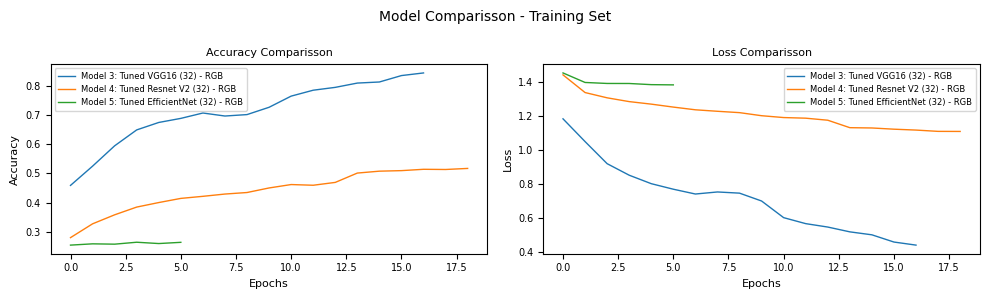

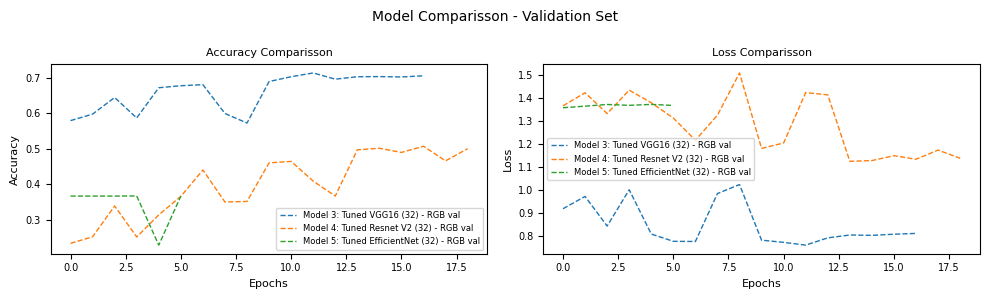

In [70]:
history_transfer_models = {
    'Model 3: Tuned VGG16 (32) - RGB': history_vgg16['Model 3: Tuned VGG16 (32) - RGB'],
    'Model 4: Tuned Resnet V2 (32) - RGB': history_resnet['Model 4: Tuned Resnet V2 (32) - RGB'],
    'Model 5: Tuned EfficientNet (32) - RGB': history_efficientnet['Model 5: Tuned EfficientNet (32) - RGB']
}
loss_and_accuracy_comparisson(history_transfer_models, data_type='Training Set')
loss_and_accuracy_comparisson(history_transfer_models, data_type='Validation Set')

In [71]:
metric_transfer_models = pd.concat([
    metric_vgg16.loc['Model 3: Tuned VGG16 (32) - RGB':],
    metric_resnet.loc['Model 4: Tuned Resnet V2 (32) - RGB':],
    metric_efficientnet.loc['Model 5: Tuned EfficientNet (32) - RGB':]
])
metric_transfer_models

Accuracy Train  Accuracy Val  \
Model 3: Tuned VGG16 (32) - RGB               0.784367      0.712879   
Model 4: Tuned Resnet V2 (32) - RGB           0.513667      0.506731   
Model 5: Tuned EfficientNet (32) - RGB        0.264015      0.367089   

                                        Accuracy Test  
Model 3: Tuned VGG16 (32) - RGB                0.8125  
Model 4: Tuned Resnet V2 (32) - RGB            0.3750  
Model 5: Tuned EfficientNet (32) - RGB         0.3125

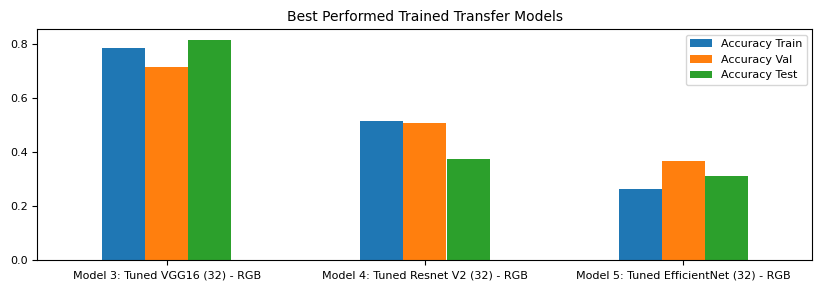

In [72]:
_ = metric_transfer_models.plot(kind='bar', figsize=(10,3))
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.title('Best Performed Trained Transfer Models', fontsize=10)
plt.legend(fontsize=8)
plt.show()

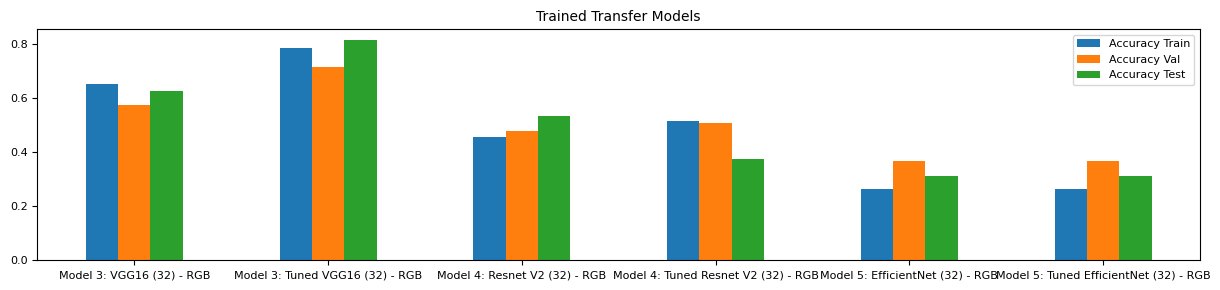

In [73]:
pd.concat([metric_vgg16, metric_resnet, metric_efficientnet]).plot(kind='bar', figsize=(15,3))
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.title('Trained Transfer Models', fontsize=10)
plt.legend(fontsize=8)
plt.show()

⏩ **Observations and Insights:**
- Making the comparison across all trained transfer models, we can conclude that tuning helped the model to improve. This tuning means allowing backpropagation
to retrain the n-last layers of the convolutional block obtained from the base model (VGG16, Resnet V2, EfficientNet). This is because we allow the model to find specific features related to the current problem to solve.
- The advantages of these models are that they were trained in colored images, having the possibility to capture features from the color information so our transfer models could use those weights learned with images encoded in 3 channels (RGB) as our current dataset. Remember they are in gray color, but they are encoded in 3 channels.
- The bad performance of some of these trained transfer models could be related to the tuning, maybe this "tune" parameter could be increased to have more final layers of the convolutional block being retrained. The last 2 base models: ResNet and EfficientNet obtained the lower accuracy (48.3% and 33% respectively) but their tunning was very low in comparison to the number of layers they have in the convolutional block (for ResNet, tune=5 having 546 layers, for EfficientNet, tune=7 having 561 layers).

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

# **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

### **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.


Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


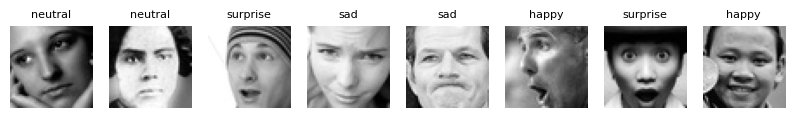

In [74]:
train_generator_gray, _, _ = create_data_loaders(IMG_DIR, 'grayscale')

# Taking a look at some examples of our augmented training data with color_mode='rgb'.
images, labels = next(train_generator_gray)
fig, axes = plt.subplots(1, 8, figsize = (10, 2))
for (image, label, ax) in zip(images, labels, axes.flatten()):
  ax.imshow(image, cmap='gray')
  ax.set_title(FACE_EXPRESSIONS[list(label).index(1)], fontsize=8)
  ax.axis('off')
plt.show()

## **Model 6: Complex Neural Network**
---

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [75]:
# Model 6: Complex Neural Network
def model_builder_complex_cnn(input_shape):
  """Creating a Complex Neural Network.
  """
  model = Sequential([
      Conv2D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=input_shape),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),

      Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),

      Conv2D(filters=512, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),

      Conv2D(filters=512, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),

      Conv2D(filters=128, kernel_size=2, activation='relu', padding='same'),
      BatchNormalization(),
      LeakyReLU(0.1),
      MaxPooling2D(pool_size=2),
      Dropout(0.2),

      Flatten(),

      Dense(256, activation='relu'),
      BatchNormalization(),
      Dropout(0.4),

      Dense(512, activation='relu'),
      BatchNormalization(),
      Dropout(0.4),

      Dense(4, activation='softmax')
  ])

  # Compile model
  optimizer = Adam(learning_rate = 0.01)        # Using SGD Optimizer
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  # Generating the summary of the model
  print(model.summary())
  return model

---------------------------------------------
Model 6: Complex CNN (32) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         


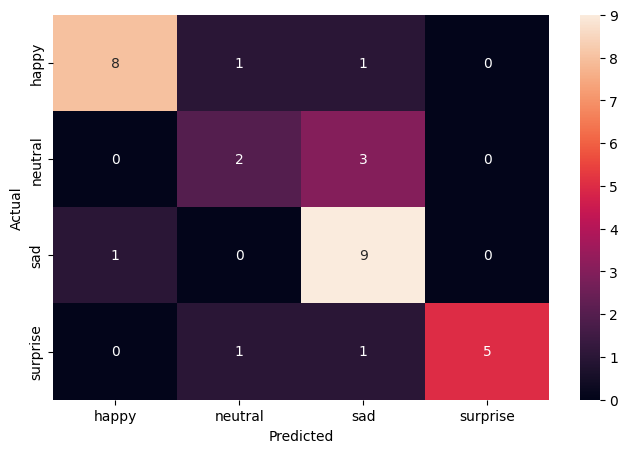

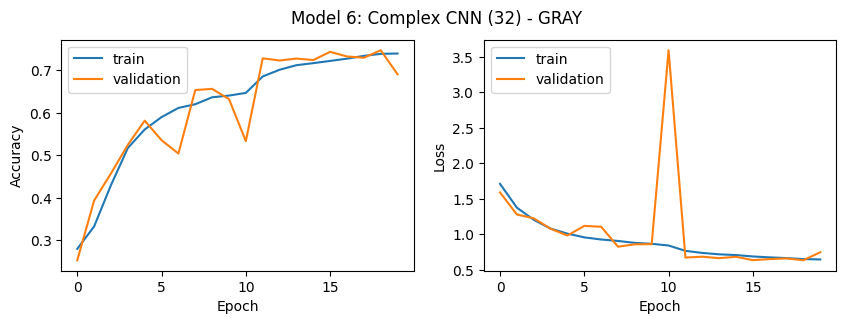

In [76]:
batch_size = 32
model_complex_cnn, metric_complex_cnn, history_complex_cnn = model_building_and_evaluating_process(
    model_builder_complex_cnn, f'Model 6: Complex CNN ({batch_size})', batch_size=batch_size, epochs=20, include_rgb=False
)

---------------------------------------------
Model 6: Complex CNN (64) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         


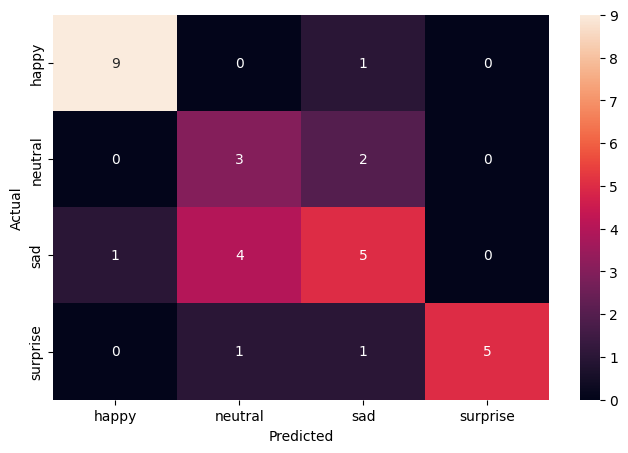

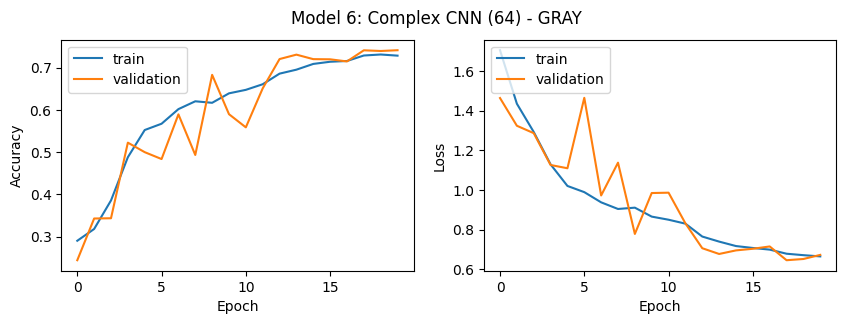

In [77]:
batch_size = 64
model, results, history = model_building_and_evaluating_process(model_builder_complex_cnn, f'Model 6: Complex CNN ({batch_size})',
                                                                batch_size=batch_size, epochs=20, include_rgb=False)
model_complex_cnn.update(model)
metric_complex_cnn = pd.concat([metric_complex_cnn, results])
history_complex_cnn.update(history)

---------------------------------------------
Model 6: Complex CNN (128) - GRAY
---------------------------------------------
Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         

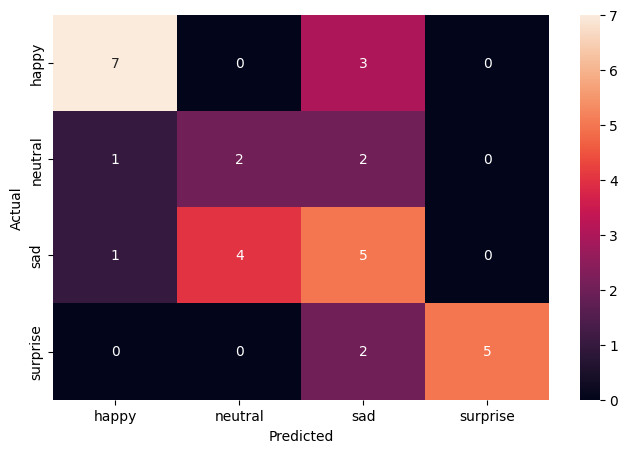

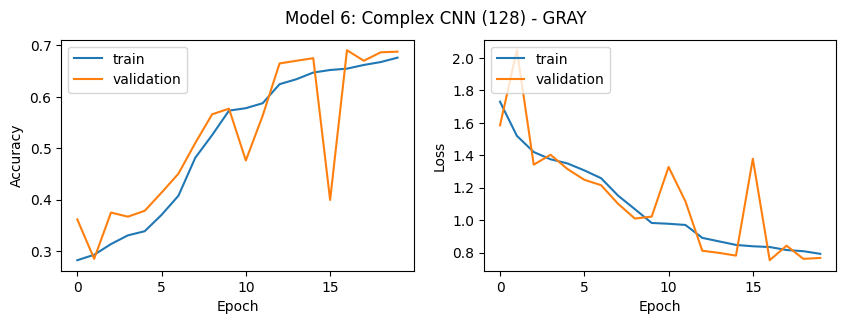

In [78]:
batch_size = 128
model, results, history = model_building_and_evaluating_process(model_builder_complex_cnn, f'Model 6: Complex CNN ({batch_size})',
                                                                batch_size=batch_size, epochs=20, include_rgb=False)
model_complex_cnn.update(model)
metric_complex_cnn = pd.concat([metric_complex_cnn, results])
history_complex_cnn.update(history)

In [79]:
model_name = 'Model 6: Complex CNN'
save_object(history_complex_cnn, f'{MODEL_DIR}/{model_name} - history.pkl')
save_object(metric_complex_cnn, f'{MODEL_DIR}/{model_name} - metrics.pkl')
save_object(model_complex_cnn, f'{MODEL_DIR}/{model_name} - models.pkl')

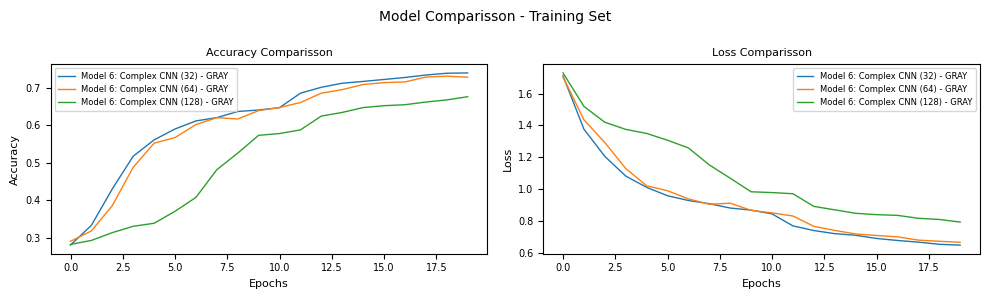

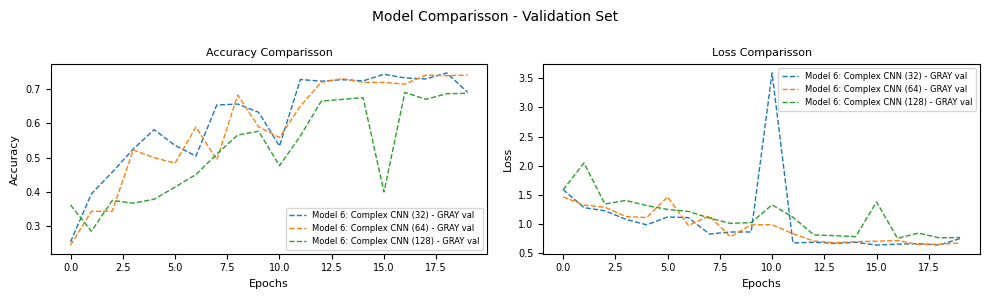

In [80]:
loss_and_accuracy_comparisson(history_complex_cnn, data_type='Training Set')
loss_and_accuracy_comparisson(history_complex_cnn, data_type='Validation Set')

In [81]:
metric_complex_cnn.style.highlight_max(color = "lightgreen", axis = 0)

⏩ **Observations and Insights:**
- It can be observed that this complex model achieved the best performance accuracy 74.7%. This is probably because having a complex hierarchy enables the model to understand the data at different levels of abstraction, early layers learn basic features while deeper layers learn complex patterns of the data. However, the complex model needs more computational resources. As long as there are limited resources, the complexity of the model will be always a trade-off to negotiate.
- In this case, this complex model takes advantage of working with Grayscale images encoded in 1 channel, instead of working with RGB images encoded in 3 channels (these RGB images will require even more resources).
- Reviewing the learning curve, it shows a lot of variation in the validation set across epochs, meaning overfitting.
- Reviewing the classification report, Happy and Surprise are the best-evaluated classes, and Sad and Neutral are the worst-evaluated classes.
**The best model "Model 6: Complex CNN (32) - GRAY" achieved 74.7% accuracy.**

⏩ **Recommendations:**
- Technique to deal with the overfitting needs to be applied to the model "Model 6: Complex CNN (32) - GRAY" and see if this improves the result in the validation set.
- Explore other image augmentation techniques to provide more data to the model.
- A review of the training dataset is necessary to confirm data are good enough.

# **Choosen Final Model**

In [82]:
# Getting back the history and metrics result during trainning
with open(f'{MODEL_DIR}/Model 1: Base Neural Network - metrics.pkl', 'rb') as f: metric_base_cnn = pickle.load(f)
with open(f'{MODEL_DIR}/Model 2: Enhanced Neural Network - metrics.pkl', 'rb') as f: metric_enhanced_cnn = pickle.load(f)
with open(f'{MODEL_DIR}/Model 3: VGG16 - metrics.pkl', 'rb') as f: metric_vgg16 = pickle.load(f)
with open(f'{MODEL_DIR}/Model 4: Resnet V2 - metrics.pkl', 'rb') as f: metric_resnet = pickle.load(f)
with open(f'{MODEL_DIR}/Model 5: EfficientNet - metrics.pkl', 'rb') as f: metric_efficientnet = pickle.load(f)
with open(f'{MODEL_DIR}/Model 6: Complex CNN - metrics.pkl', 'rb') as f: metric_complex_cnn = pickle.load(f)

In [87]:
best_performed_models = pd.concat([
    metric_base_cnn.loc['Model 1: Base Neural Network (32) - RGB':'Model 1: Base Neural Network (32) - RGB'],
    metric_enhanced_cnn['Model 2: Enhanced Neural Network (64) - RGB':'Model 2: Enhanced Neural Network (64) - RGB'],
    metric_vgg16.loc['Model 3: Tuned VGG16 (32) - RGB':'Model 3: Tuned VGG16 (32) - RGB'],
    metric_resnet.loc['Model 4: Tuned Resnet V2 (32) - RGB':'Model 4: Tuned Resnet V2 (32) - RGB'],
    metric_efficientnet.loc['Model 5: EfficientNet (32) - RGB':'Model 5: EfficientNet (32) - RGB'],
    metric_complex_cnn.loc['Model 6: Complex CNN (32) - GRAY':'Model 6: Complex CNN (32) - GRAY']
])

best_performed_models

Accuracy Train  Accuracy Val  \
Model 1: Base Neural Network (32) - RGB            0.705871      0.719108   
Model 2: Enhanced Neural Network (64) - RGB        0.826593      0.736789   
Model 3: Tuned VGG16 (32) - RGB                    0.784367      0.712879   
Model 4: Tuned Resnet V2 (32) - RGB                0.513667      0.506731   
Model 5: EfficientNet (32) - RGB                   0.263949      0.367892   
Model 6: Complex CNN (32) - GRAY                   0.738699      0.747237   

                                             Accuracy Test  
Model 1: Base Neural Network (32) - RGB            0.78125  
Model 2: Enhanced Neural Network (64) - RGB        0.68750  
Model 3: Tuned VGG16 (32) - RGB                    0.81250  
Model 4: Tuned Resnet V2 (32) - RGB                0.37500  
Model 5: EfficientNet (32) - RGB                   0.31250  
Model 6: Complex CNN (32) - GRAY                   0.75000

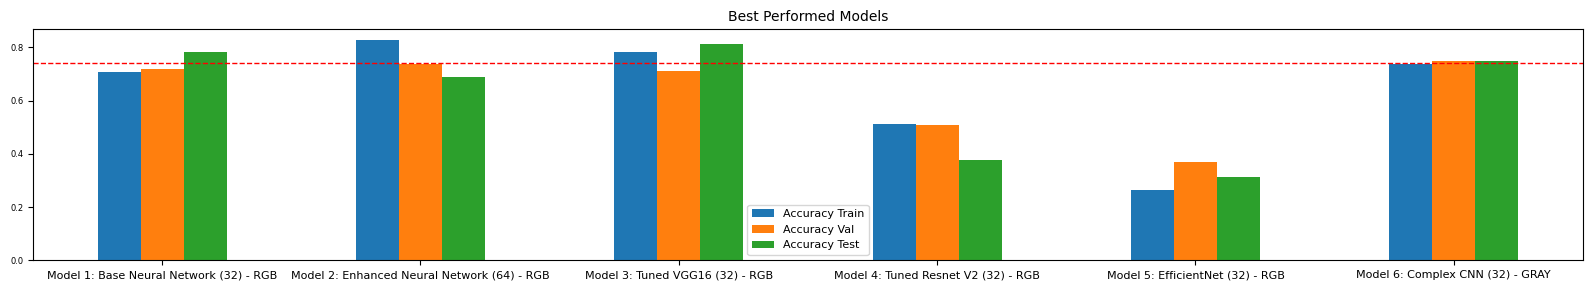

In [88]:
_ = best_performed_models.plot(kind='bar', figsize=(20,3))
plt.xticks(rotation=0, fontsize=8)
plt.axhline(y=0.74, lw=1, ls='--', c='red')
plt.yticks(fontsize=6)
plt.title('Best Performed Models', fontsize=10)
plt.legend(fontsize=8)
plt.show()

In [89]:
# Getting back a model
# Preparing the environment
init_environment()
_, test_generator, _ = create_data_loaders(IMG_DIR, 'grayscale')
X_test, y_test = test_generator.next()

# Loading the model
model = model_builder_complex_cnn(input_shape=(48, 48, 1))
model.load_weights(f'{MODEL_DIR}/Model 6: Complex CNN (32) - GRAY.h5')

# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
model.evaluate(X_test, y_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Initializing TF Session and Seed

Data with color_mode=grayscale:
Found 15109 images belonging to 4 classes.
Found 127 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                              

### **Plotting the Confusion Matrix for the chosen final model**

1/1 [==============================] - 0s 216ms/step
Actual    : [0 1 3 0 1 3 2 1 0 2 0 3 2 2 3 0 3 2 0 2 1 3 2 2 0 0 3 0 1 2 0 2]
Prediction: [0 1 3 0 2 3 2 1 0 1 1 3 2 0 3 0 3 2 0 2 1 3 1 2 0 2 1 0 1 1 0 2]



              precision    recall  f1-score   support

       happy       0.89      0.80      0.84        10
     neutral       0.44      0.80      0.57         5
         sad       0.75      0.60      0.67        10
    surprise       1.00      0.86      0.92         7

    accuracy                           0.75        32
   macro avg       0.77      0.76      0.75        32
weighted avg       0.80      0.75      0.76        32



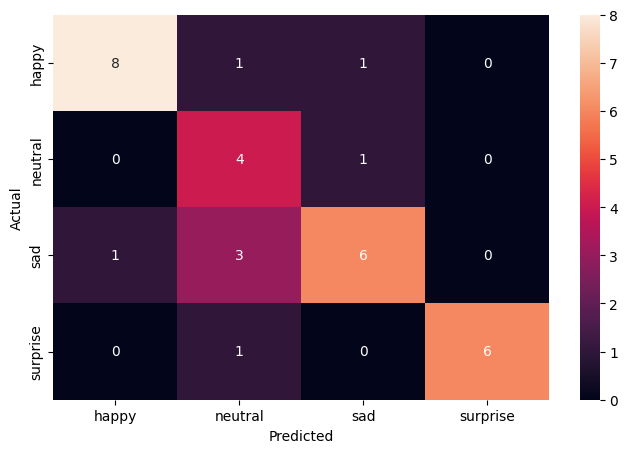

In [90]:
# Getting the history back as this a required parameter in our defined function.
with open(f'{MODEL_DIR}/Model 6: Complex CNN - history.pkl', 'rb') as f: history = pickle.load(f)

# Preparing the variables
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)
print('Actual    :', y_test)
print('Prediction:', y_pred)
print('\n\n')

# Plotting the classification report and confussion matrix
results = metrics_score(y_test, y_pred, 'Model 6: Complex CNN (32) - GRAY', history['Model 6: Complex CNN (32) - GRAY'])

⏩ **Observations and Insights:**

- The selected model, with 33 layers, achieves 75% of accuracy in the final test.
- The Happy and Surprise are the best evaluated classes.
- The Neutral and Sad are the classes with the lowed f1-score.

⏩ **Observations and Insights:**

A couple of things can be done to try to improve this model:

- Deal with the overfitting by tuning the already applied techniques (Dropout, BatchNormalization).
- Explore kernel regularization as another possible technique to deal with overfitting.
- Take a look at the dataset to confirm the features for the Neutral and Sad classes, verifying if they are representative.
- Explore other image augmentation techniques to provide more data to the model.

## **Final Conclusions and Insights**

⏩ **Conclusions and Insights:**

- Complex models lead to having a better understanding of the data in classification problems. Overfitting is the highest risk in complex models.
- Transfer models are an optimal approach to take advantage of models trained in millions of images, saving computation resources, however, overfitting is also present, and techniques to deal with this problem need to be considered/applied. Also, it is necessary to enable backpropagation in the final layers of the convolutional block to enable the model to learn the particularities of the problem and get the best of it.
- The quality of the dataset is a key player in the modeling of a solution, bad poor data set leads to bad poor models.

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

  > ⏩ Even do, the dataset is balanced, features in some of the classes are difficult to identify, even for the human eyes. A review of the training dataset is necessary to confirm data is good enough. As it was mentioned before some images seem to belong to another class that the one they are currently on.

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  > ⏩ With the exception of the "Model 4: Tuned Resnet V2" and "Model 5: Tuned EfficientNet", all models achieve more than 70% of accuracy. However, the time to tune and explore each model was huge.
  >
  > ⏩ "Model 4: Tuned Resnet V2" and "Model 5: Tuned EfficientNet" need to be recompiled with the "tune" parameter increased to enable a longer backpropagation, exploring if this improves the model.

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?
  > ⏩ There are 3 models in the final solution that can be selected:
  > - "Model 2: Enhanced Neural Network (64) - RGB" that achieved 73.7% of accuracy.
  > - "Model 3: Tuned VGG16 (32) - RGB" that achieved 71.3% of accuracy, had a consistent evolution through epochs during the training, and took advantage of the VGG16 models.
  > - "Model 6: Complex CNN (32) - GRAY" that achieved 74.7% of accuracy, and had a good performance on the testing set.
  >
  > ⏩ With the current trained models and results, I recommend "**Model 6: Complex CNN (32) - GRAY**" as it achieved the best validation performance.

# Final Submission
---

## **Executive Summary**

> ⏩ In this classification problem, the goal was to find a model that could classify images in 4 different expressions: Happy, Surprise, Sad, and Neutral. For that, I have experimented with 21 different models and 3 approaches to try to find the best model that has an acceptable behavior in this classification task.
Accordingly to the business, this task is quite important and is part of the roadmap they have in place for the present period. The main specification was to find a model that could classify the images better than a random guess, meaning that at least a 70% of accuracy would be acceptable for a proposed model.
>
> ⏩ There were 21 models that were trained and reviewed:
> 1.   6 models related to a basic CNN model of 13 layers. These models were trained considering the batch sizes 32, 64, and 128, and the images set in RGB or Grayscale. The best result was obtained with the batch size 32 and the RGB set. These models included, in the convolutional layer block, the following layers: Conv2D, max_pooling2d (for downsampling the feature map), and dropout (for dealing with possible overfitting).
> 2. 6 models related to an enhanced CNN model of 20 layers. These models were trained considering the batch sizes 32, 64, and 128, and the images set in RGB or Grayscale. The best result was obtained with the batch size 64 and the RGB set. These models were a little bit more complex than models 1, 2, and 3. They included "leaky_re_lu" (to ensure positive values always, an enhancement of the normal ReLu activation function), "batch_normalization" (to speed up training and use higher learning rates, making learning easier), and "max_pooling2d" (to downsample the feature map).  
> 3. 2 models using the transfer model approach with VGG16. This model considered the 18 layers of the convolutional VGG16 block and 7 layers added as part of the classification component. The first try saved/applied the already achieved weights of the VGG16 convolutional block, and in the second try, a tuned process took place, retraining the last 4 layers of the convolutional block (VGG16) with the training dataset belonging to the current classification problem. The best result was obtained with this tunned VGG16 transfer model.
> 4. 2 models using the transfer model approach with ResNet V2. This model considered the 546 layers of the convolutional ResNet V2 block and 7 layers added as part of the classification component. The first try saved/applied the already achieved weights of the ResNet V2 convolutional block, and in the second try, a tunned process took place, retraining the last 5 layers of that convolutional block (ResNet V2) with the training dataset belonging to the current classification problem. The best result was obtained with this tuned ResNet V2 transfer model.
> 5. 2 models using the transfer model approach with EfficientNet. This model includes the 561 layers of the convolutional EfficientNet block and 7 layers added as part of the classification component. The first try saved/applied the already achieved weights of the EfficientNet convolutional block, and in the second try, a tuned process took place, retraining the last 7 layers of that convolutional block (EfficientNet) with the training dataset belonging to the current classification problem. The best result was obtained with the no-tuned EfficientNet transfer model.
> 6. 3 models related to a Complex CNN model of 33 layers and a batch size of 32, 64, and 128, considering only the images set in grayscale. These models were more complex, a kind of robust CNN model, They included "Conv2D", "leaky_re_lu" (to ensure positive values always, an enhancement of the normal ReLu activation function), "batch_normalization" (to speed up training and enable higher learning rates), "max_pooling2d" (to downsample the feature map), and dropout (to deal with possible overfitting). The best result was obtained with batch size 32.
>
> ⏩ The 3 followed approaches were:
> - A basic CNN model (Models from 1 to 6) that explored the use of the convolutional layers and how to deal with overfitting during the training.
> - A transfer model technique (Models from 7 to 12), to use the advantages of already training models and use those achieved weights to include them as part of the current classification problem.
> - A complex CNN model (Models from 13 to 15) that applies the learned lessons on the previous approach to finding a path that can achieve the expected result in the classification problem.
>
> **Findings**
>
> - Complex models lead to having a better understanding of the data in classification problems. Overfitting is the highest risk in complex models.
> -Transfer models are an optimal approach to take advantage of models trained in millions of images, saving computation resources, however, overfitting is also present, and techniques to deal with this problem need to be considered/applied. Also, it is necessary to enable backpropagation in the final layers of the convolutional block to enable the model to learn the particularities of the problem and get the best of it.
> - The quality of the dataset is a key player in the modeling of a solution, bad poor data set leads to bad poor models.
>
> **Final Proposed Model**
>
> ⏩ The model that achieved the greatest accuracy was the "Complex model with batch size 32 and focused on a grayscale images dataset". In only 20 epochs this model achieved approximately 75% of accuracy, looking promising for the future. 
> 
> The selected and recommended model has 33 layers, the first 25 layers belong to the Feature extraction, and the last 8 layers to the Classification process. The feature extraction section is conformed of 5 convolutional blocks, each of them considered Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, and Dropout. The classification section related to the fully connected layers considered Flatten, Dense, BatchNormalization, and Dropout. Notice that Overfitting was considered and addressed in this complex robust CNN model.

## Solution Summary

> ⏩ The "Complex model with batch size 32 and focused on a grayscale images dataset" is the selected and recommended model because:
> - Achieved the best result in all the 21 training models.
> - In only 20 epochs reached 75% of accuracy.
> - The learning curve shows that learning is still possible, so having more epochs to train will be beneficial.
>
> ⏩ The recommended model "Complex model with batch size 32 and focused on a grayscale images dataset" can be applied to the business to start classifying the images to address each image according to its class, this will improve the business operation by reducing time and cost. The company will not require hiring people for classification activities, allowing them to focus on their main objectives that take place after addressing each image in the right direction.
>
> ### **Benefits**
>
> ⏩ Making a comparison between the cost and time invested in the classification of 30,000 images, we have:
>
> ⏩ For the **Manual Process**:
> - Invested time: **21 working days.** <br>
> 20 sec. per image, for 30,000 images, one person will need 21 working days to complete the task.
> - Operational cost: **1,218.00 USD per month.** No more tasks can be assigned. <br>
> Considering the minimum hourly salary of 7.25 USD, the cost of having one person working on the classification of 30,000 images will cost 1,218 USD.
>
> ⏩ For the **Deep Learning Supported Process**
> - Invested time: **7 minutes.** <br>
> Approx 0.5 sec per batch of 32 images using Google Colab Pro Service. To classify 30,000 images, the model will need approx 7 minutes.
> - Operational cost: **9.99 USD per month.** More tasks can be assigned. <br>
> The Google Colab Pro Service costs 9.99 USD per month. This provides 100 compute units per month, Faster GPUs, and access to higher memory machines.
>
> ⏩ **If the business implements this recommended Model, it will save time and money on this classification task, allowing them to focus resources on more strategic activities.**

## Recommendations for implementation
 
> ⏩ **Next steps and recommendations**
>
> - All previous models achieved better results with the RGB datasets, exploring the recommended model with the RGB dataset is advisable to verify if the model can improve.
> - The learning curve shows that the recommended model still learns at the end of the 20 epochs, it is necessary to explore if having more than 20 epochs gives a better result.
> 
> ⏩ **Main observations and risk**
>
> - The image dataset needs to be reviewed and ensure acceptable quality.
> - The company needs also to explore the possibility to get more images, paying special attention to Neutral and Sad classes.

### **References**

- He, H., & Ma, Y. (Eds.). (2013). Imbalanced learning: foundations, algorithms, and applications.

- Save, serialize, and export models | TensorFlow Core. (n.d.). TensorFlow. https://www.tensorflow.org/guide/keras/serialization_and_saving


- Team, K. (n.d.). Keras documentation: Keras API reference. Keras API Reference. https://keras.io/api/

- Module: tf | TensorFlow v2.13.0. (n.d.). TensorFlow. https://www.tensorflow.org/api_docs/python/tf

- Colab Subscription Pricing. (n.d.). Colab Subscription Pricing. https://colab.research.google.com/signup

-----------------